#  ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png)  Project 2 - Singapore Housing Data and Kaggle Challenge Notebook 1 

--- 
# Part 1 
---

## Contents:
- [Background](#Background)
- [Data Sources](#Data-Sources)
- [Importing Data & Exploratory Data Analysis](#Importing-Data)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualisation](#Data-Visualisation)

<a id='Background'></a>
## Background

[The Housing Development Board (HDB)](https://www.hdb.gov.sg/cs/infoweb/about-us) is a government board that offers affordable public housing to Singapore citizens. 

In the recent [2023 Asia Pacific ULI Attainability Index](https://asia.uli.org/wp-content/uploads/2023/05/ULI-Home-Attainability-Index-report_-28-May-Finalised.pdf), Singapore passes Hong Kong as the highest median housing price per unit in 2023. As [private housing increases](https://www.channelnewsasia.com/singapore/private-property-condo-prices-q1-2023-absd-ura-3450651), Singaporeans would logically look at HDB housing for a more afforable and reasonable option. However, with [HDB housing prices increasing](https://www.businesstimes.com.sg/property/hdb-resale-prices-rise-further-april-amid-falling-volume-srx-99co), it is suffocating to think about saving up to purchase housing for the future.

### <u>Factors affecting housing prices</u>

There are many factors that people look for when looking into buying their housing. My hypothesis is that these factors likely contribute to the pricing of the property. 

Some factors to be considered can be found on [this very detailed Stacked Homes article](https://stackedhomes.com/editorial/the-ultimate-step-by-step-walkthrough-to-viewing-a-resale-hdb-like-a-pro-with-pictures/#gs.31mkgj), and [this Seedly blog post](https://blog.seedly.sg/how-choose-buy-hdb-resale-flat/). Two commonly repeated factors include:
* Whether it is near an MRT station and/or bus stop
* Whether there is a mall or grocery store nearby

These factors boil down to accessibility. Another important one is its proximity to schools. According to the [Ministry Of Education](https://www.moe.gov.sg/primary/p1-registration/distance) website, the priority of admissions to primary schools are dependent on your proximity to the school. This is crucial for couples who are planning on having children and having them enrolled in a local school. 

These few factors only touch the surface, but it would be enough to refer to with our current dataset.

## Problem Statement

Coming from the background of someone who has recently moved back to Singapore and is planning on settling down and starting a family here in the future, I am interested in <font color = 'green'>**analysing and predicting housing resale prices**</font>, given the current trends and the possible factors that could affect the price.

<a id='Data-Sources'></a>
## Data Sources

---

* [Kaggle](https://www.kaggle.com/competitions/dsi-sg-project-2-regression-challenge-hdb-price/data)

### Data Dictionary

[**All information from Kaggle**](https://www.kaggle.com/competitions/dsi-sg-project-2-regression-challenge-hdb-price/data)

|Feature|Type|Description|
|---|---|---|
|resale_price|float|the property's sale price in Singapore dollars. This is the target variable that we're trying to predict for this challenge.|
|Tranc_YearMonth|object|year and month of the resale transaction|
|town|object|HDB township where the flat is located|
|flat_type|object|type of the resale flat unit|
|block|object|block number of the resale flat|
|street_name|object|street name where the resale flat resides|
|storey_range|object|floor level (range) of the resale flat unit|
|floor_area_sqm|float|floor area of the resale flat unit in square metres|
|flat_model|object|HDB model of the resale flat|
|lease_commence_date|integer|commencement year of the flat unit's 99-year lease|
|Tranc_Year|integer|year of resale transaction|
|Tranc_Month|integer|month of resale transaction|
|mid_storey|integer|median value of storey_range|
|lower|integer|lower value of storey_range|
|upper|integer|upper value of storey_range|
|mid|integer|middle value of storey_range|
|full_flat_type|object|combination of flat_type and flat_model|
|address|object|combination of block and street_name|
|floor_area_sqft|float|floor area of the resale flat unit in square feet|
|hdb_age|integer|number of years from lease_commence_date to present year|
|max_floor_lvl|integer|highest floor of the resale flat|
|year_completed|integer|year which construction was completed for resale flat|
|residential|object|boolean value if resale flat has residential units in the same block|
|commercial|object|boolean value if resale flat has commercial units in the same block|
|market_hawker|object|boolean value if resale flat has a market or hawker centre in the same block|
|multistorey_carpark|object|boolean value if resale flat has a multistorey carpark in the same block|
|precinct_pavilion|object|boolean value if resale flat has a pavilion in the same block|
|total_dwelling_units|integer|total number of residential dwelling units in the resale flat|
|1room_sold|integer|number of 1-room residential units in the resale flat|
|2room_sold|integer|number of 2-room residential units in the resale flat|
|3room_sold|integer|number of 3-room residential units in the resale flat|
|4room_sold|integer|number of 4-room residential units in the resale flat|
|5room_sold|integer|number of 5-room residential units in the resale flat|
|exec_sold|integer|number of executive type residential units in the resale flat block|
|multigen_sold|integer|number of multi-generational type residential units in the resale flat block|
|studio_apartment_sold:|integer|number of studio apartment type residential units in the resale flat block|
|1room_rental|integer|number of 1-room rental residential units in the resale flat block|
|2room_rental|integer|number of 2-room rental residential units in the resale flat block|
|3room_rental|integer|number of 3-room rental residential units in the resale flat block|
|other_room_rental|integer|number of "other" type rental residential units in the resale flat block|
|postal|object|postal code of the resale flat block|
|Latitude|float|Latitude based on postal code|
|Longitude|float|Longitude based on postal code|
|planning_area|object|Government planning area that the flat is located|
|Mall_Nearest_Distance|float|distance (in metres) to the nearest mall|
|Mall_Within_500m|float|number of malls within 500 metres|
|Mall_Within_1km|float|number of malls within 1 kilometre|
|Mall_Within_2km|float|number of malls within 2 kilometres|
|Hawker_Nearest_Distance|float|distance (in metres) to the nearest hawker centre|
|Hawker_Within_500m|float|number of hawker centres within 500 metres|
|Hawker_Within_1km|float|number of hawker centres within 1 kilometre|
|Hawker_Within_2km|float|number of hawker centres within 2 kilometres|
|hawker_food_stalls|integer|number of hawker food stalls in the nearest hawker centre|
|hawker_market_stalls|integer|number of hawker and market stalls in the nearest hawker centre|
|mrt_nearest_distance|float|distance (in metres) to the nearest MRT station|
|mrt_name|object|ame of the nearest MRT station|
|bus_interchange|integer|boolean value if the nearest MRT station is also a bus interchange|
|mrt_interchange|integer|boolean value if the nearest MRT station is a train interchange station|
|mrt_latitude|float|latitude (in decimal degrees) of the the nearest MRT station|
|mrt_longitude|float|longitude (in decimal degrees) of the nearest MRT station|
|bus_stop_nearest_distance|float|distance (in metres) to the nearest bus stop|
|bus_stop_name|object|name of the nearest bus stop|
|bus_stop_latitude|float|latitude (in decimal degrees) of the the nearest bus stop|
|bus_stop_longitude|float|longitude (in decimal degrees) of the nearest bus stop|
|pri_sch_nearest_distance|float|distance (in metres) to the nearest primary school|
|pri_sch_name|object|name of the nearest primary school|
|vacancy|integer|number of vacancies in the nearest primary school|
|pri_sch_affiliation|integer|boolean value if the nearest primary school has a secondary school affiliation|
|pri_sch_latitude|float|latitude (in decimal degrees) of the the nearest primary school|
|pri_sch_longitude|float|longitude (in decimal degrees) of the nearest primary school|
|sec_sch_nearest_dist|float|distance (in metres) to the nearest secondary school|
|sec_sch_name|object|name of the nearest secondary school|
|cutoff_point|integer|PSLE cutoff point of the nearest secondary school|
|affiliation|integer|boolean value if the nearest secondary school has an primary school affiliation|
|sec_sch_latitude|float|latitude (in decimal degrees) of the the nearest secondary school|
|sec_sch_longitude|float|longitude (in decimal degrees) of the nearest secondary school|

<a id='Importing-Data'></a>
## Importing Data

---

In [2]:
# Importing packages
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the data
train = pd.read_csv('data/train.csv', low_memory = False)

In [4]:
# Checking the shape of the train data
print(train.shape)
train.head()

(150634, 77)


id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471         2016-05  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598         2012-07           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897         2013-07      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070         2012-04           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632         2017-12           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  floor_area_sqm  flat_model  lease_commence_date  ...  vacancy  \
0     10 TO 12            90.0     Model A                 2006  ...       78   
1     07 TO 09           130.0    Improved                 1987  ...       45   
2     13 TO 15           144.0   Apartment                 1997  ...       39   
3     01 TO 05           103.0     Model A                 1992  ...       20   
4     01 TO 03            83.0  Simplified                 1987  ...       74   

   pri_sch_affiliation  pri_sch_latitude  pri_sch_longitude  \
0                    1          1.317659         103.882504   
1                    1          1.349783         103.854529   
2                    0          1.345245         103.756265   
3                    1          1.354789         103.844934   
4                    0          1.416280         103.838798   

   sec_sch_nearest_dist                             sec_sch_name  \
0           1138.633422                 Geylang Methodist School   
1            447.894399  Kuo Chuan Presbyterian Secondary School   
2            180.074558             Yusof Ishak Secondary School   
3            389.515528                     Catholic High School   
4            312.025435             Orchid Park Secondary School   

   cutoff_point affiliation sec_sch_latitude  sec_sch_longitude  
0           224           0         1.317659         103.882504  
1           232           0         1.350110         103.854892  
2           188           0         1.342334         103.760013  
3           253           1         1.354789         103.844934  
4           208           0         1.414888         103.838335  

[5 rows x 77 columns]

### Checking Type and Null Values In Each Column

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

In [5]:
# Making it easier to access the names
train.columns = train.columns.str.lower()

In [6]:
# Checking number of null values in a better format
pd.set_option("display.max_rows" , None)

train.isnull().sum()

id                               0
tranc_yearmonth                  0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
resale_price                     0
tranc_year                       0
tranc_month                      0
mid_storey                       0
lower                            0
upper                            0
mid                              0
full_flat_type                   0
address                          0
floor_area_sqft                  0
hdb_age                          0
max_floor_lvl                    0
year_completed                   0
residential                      0
commercial                       0
market_hawker                    0
multistorey_carpark              0
precinct_pavilion                0
total_dwelling_units

Narrowing down to check out the columns with null values and its' related columns

In [7]:
null = ['mall_nearest_distance', 'mall_within_500m', 'mall_within_1km', 'mall_within_2km', 'hawker_nearest_distance', 'hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km', 'hawker_food_stalls', 'hawker_market_stalls']

train[null].head(20)

mall_nearest_distance  mall_within_500m  mall_within_1km  mall_within_2km  \
0             1094.090418               NaN              NaN              7.0   
1              866.941448               NaN              1.0              3.0   
2             1459.579948               NaN              NaN              4.0   
3              950.175199               NaN              1.0              4.0   
4              729.771895               NaN              1.0              2.0   
5              684.004001               NaN              3.0              6.0   
6              490.262931               1.0              1.0              8.0   
7             1749.147519               NaN              NaN              3.0   
8              445.717070               1.0              1.0              1.0   
9              853.383254               NaN              2.0              7.0   
10             835.381881               NaN              3.0              8.0   
11             575.029500               NaN              5.0              6.0   
12             721.932003               NaN              1.0              5.0   
13             389.599339               1.0              2.0             27.0   
14             617.234733               NaN              2.0              5.0   
15             566.617284               NaN              4.0              8.0   
16             350.293150               1.0              1.0              3.0   
17             715.673984               NaN              1.0              4.0   
18             391.893534               1.0              1.0              2.0   
19             155.032607               1.0              1.0              3.0   

    hawker_nearest_distance  hawker_within_500m  hawker_within_1km  \
0                154.753357                 1.0                3.0   
1                640.151925                 NaN                1.0   
2               1762.082341                 NaN                NaN   
3                726.215262                 NaN                1.0   
4               1540.151439                 NaN                NaN   
5                148.418247                 2.0                5.0   
6                516.981824                 NaN                1.0   
7                734.252454                 NaN                2.0   
8               1032.848455                 NaN                NaN   
9               1743.704293                 NaN                NaN   
10              1634.750527                 NaN                NaN   
11               965.856049                 NaN                1.0   
12               607.823428                 NaN                2.0   
13               149.192053                 3.0                5.0   
14              1237.267468                 NaN                NaN   
15               441.568971                 1.0                1.0   
16               364.808811                 1.0                1.0   
17               948.552346                 NaN                1.0   
18               943.990286                 NaN                1.0   
19               970.164326                 NaN                1.0   

    hawker_within_2km  hawker_food_stalls  hawker_market_stalls  
0                13.0                  84                    60  
1                 7.0                  80                    77  
2                 1.0                  84                    95  
3                 9.0                  32                    86  
4                 1.0                  45                     0  
5                11.0                  79                    82  
6                 4.0                  40                     0  
7                 5.0                  36                    75  
8                 4.0                  31                    51  
9                 1.0                  40                     0  
10                1.0                  40                     0  
11                3.0                  

After looking through the dataframe, it is clear that the null values are due to there being no mall or hawkers within that specified range. Let's double check this, and replace the null values with 0 if it is confirmed that there are no malls or hawkers within that specified range


### Dealing With Null Values

Defining a function to double check if values match the corresponding mall distance.

In [8]:
def correct_distance(nearest_distance_column, dist, within_column, dataframe):
    pd.set_option('mode.chained_assignment', None )
    for ind in range(len(dataframe)):
        if dataframe[nearest_distance_column].iloc[ind] > dist:
            dataframe[within_column].iloc[ind] = 0

    return dataframe[null].head(10)

In [9]:
# Implementing the function for mall distance null values
correct_distance('mall_nearest_distance', 500, 'mall_within_500m', train)
correct_distance('mall_nearest_distance', 1_000, 'mall_within_1km', train)
correct_distance('mall_nearest_distance', 2_000, 'mall_within_2km', train)

# Implementing the function for hawker distance null values
correct_distance('hawker_nearest_distance', 500, 'hawker_within_500m', train)
correct_distance('hawker_nearest_distance', 1_000, 'hawker_within_1km', train)
correct_distance('hawker_nearest_distance', 2_000, 'hawker_within_2km', train)

mall_nearest_distance  mall_within_500m  mall_within_1km  mall_within_2km  \
0            1094.090418               0.0              0.0              7.0   
1             866.941448               0.0              1.0              3.0   
2            1459.579948               0.0              0.0              4.0   
3             950.175199               0.0              1.0              4.0   
4             729.771895               0.0              1.0              2.0   
5             684.004001               0.0              3.0              6.0   
6             490.262931               1.0              1.0              8.0   
7            1749.147519               0.0              0.0              3.0   
8             445.717070               1.0              1.0              1.0   
9             853.383254               0.0              2.0              7.0   

   hawker_nearest_distance  hawker_within_500m  hawker_within_1km  \
0               154.753357                 1.0                3.0   
1               640.151925                 0.0                1.0   
2              1762.082341                 0.0                0.0   
3               726.215262                 0.0                1.0   
4              1540.151439                 0.0                0.0   
5               148.418247                 2.0                5.0   
6               516.981824                 0.0                1.0   
7               734.252454                 0.0                2.0   
8              1032.848455                 0.0                0.0   
9              1743.704293                 0.0                0.0   

   hawker_within_2km  hawker_food_stalls  hawker_market_stalls  
0               13.0                  84                    60  
1                7.0                  80                    77  
2                1.0                  84                    95  
3                9.0                  32                    86  
4                1.0                  45                     0  
5               11.0                  79                    82  
6                4.0                  40                     0  
7                5.0                  36                    75  
8                4.0                  31                    51  
9                1.0                  40                     0

In [10]:
# Double checking if there are any other missing values.
train.isnull().sum()

id                             0
tranc_yearmonth                0
town                           0
flat_type                      0
block                          0
street_name                    0
storey_range                   0
floor_area_sqm                 0
flat_model                     0
lease_commence_date            0
resale_price                   0
tranc_year                     0
tranc_month                    0
mid_storey                     0
lower                          0
upper                          0
mid                            0
full_flat_type                 0
address                        0
floor_area_sqft                0
hdb_age                        0
max_floor_lvl                  0
year_completed                 0
residential                    0
commercial                     0
market_hawker                  0
multistorey_carpark            0
precinct_pavilion              0
total_dwelling_units           0
1room_sold                     0
2room_sold

In [11]:
# Checking percentage of null values
print(train.shape)
train['mall_nearest_distance'].isnull().sum()/ train.shape[0]

(150634, 77)


0.005503405605640161

The percentage of data with null values is 0.5%, which is not as significant. As such, we will drop these rows to get more accurate results.

In [12]:
train.drop(index = train[train['mall_nearest_distance'].isnull()].index, axis = 0, inplace = True)
train.shape

(149805, 77)

In [13]:
pd.set_option('display.max_columns', None)
train.head(10)

id tranc_yearmonth             town  flat_type block  \
0   88471         2016-05  KALLANG/WHAMPOA     4 ROOM    3B   
1  122598         2012-07           BISHAN     5 ROOM   153   
2  170897         2013-07      BUKIT BATOK  EXECUTIVE  289B   
3   86070         2012-04           BISHAN     4 ROOM   232   
4  153632         2017-12           YISHUN     4 ROOM   876   
5   26610         2013-01          GEYLANG     3 ROOM    95   
6  173300         2018-05          HOUGANG     5 ROOM   641   
7   55093         2012-03            BEDOK     3 ROOM   701   
8  166738         2020-01           BISHAN     5 ROOM   450   
9  103385         2014-06         SENGKANG     5 ROOM  307D   

          street_name storey_range  floor_area_sqm      flat_model  \
0    UPP BOON KENG RD     10 TO 12            90.0         Model A   
1        BISHAN ST 13     07 TO 09           130.0        Improved   
2      BT BATOK ST 25     13 TO 15           144.0       Apartment   
3        BISHAN ST 22     01 TO 05           103.0         Model A   
4        YISHUN ST 81     01 TO 03            83.0      Simplified   
5       ALJUNIED CRES     07 TO 09            65.0        Improved   
6       HOUGANG AVE 8     07 TO 09           120.0        Improved   
7  BEDOK RESERVOIR RD     06 TO 10            68.0  New Generation   
8        SIN MING AVE     10 TO 12           125.0        Improved   
9       ANCHORVALE RD     10 TO 12           110.0        Improved   

   lease_commence_date  resale_price  tranc_year  tranc_month  mid_storey  \
0                 2006      680000.0        2016            5          11   
1                 1987      665000.0        2012            7           8   
2                 1997      838000.0        2013            7          14   
3                 1992      550000.0        2012            4           3   
4                 1987      298000.0        2017           12           2   
5                 1975      335000.0        2013            1           8   
6                 1987      433000.0        2018            5           8   
7                 1980      340000.0        2012            3           8   
8                 1989      700000.0        2020            1          11   
9                 2001      490000.0        2014            6          11   

   lower  upper  mid         full_flat_type                  address  \
0     10     12   11         4 ROOM Model A     3B, UPP BOON KENG RD   
1      7      9    8        5 ROOM Improved        153, BISHAN ST 13   
2     13     15   14    EXECUTIVE Apartment     289B, BT BATOK ST 25   
3      1      5    3         4 ROOM Model A        232, BISHAN ST 22   
4      1      3    2      4 ROOM Simplified        876, YISHUN ST 81   
5      7      9    8        3 ROOM Improved        95, ALJUNIED CRES   
6      7      9    8        5 ROOM Improved       641, HOUGANG AVE 8   
7      6     10    8  3 ROOM New Generation  701, BEDOK RESERVOIR RD   
8     10     12   11        5 ROOM Improved        450, SIN MING AVE   
9     10     12   11        5 ROOM Improved      307D, ANCHORVALE RD   

   floor_area_sqft  hdb_age  max_floor_lvl  year_completed residential  \
0          968.760       15             25            2005           Y   
1         1399.320       34              9            1987           Y   
2         1550.016       24             16            1996           Y   
3         1108.692       29             11            1990           Y   
4          893.412       34              4            1987           Y   
5          699.660       46             12            1974           Y   
6         1291.680       34             17            1986           Y   
7          731.952       41             12            1980           Y   
8         1345.500       32             25            1988           Y   
9         1184.040       20             17            2000           Y   

  commercial market_hawker multistorey_carpark precinct_pavilion  \
0          N      

Let's also make sure there are no duplicated rows.

In [14]:
train.duplicated().sum()

0

No duplicates! Now we can continue examining our data.

<br>

### Filtering Columns To Drop

After examining the data and columns closer, let's make a few passes at dropping some columns. Some rationalisation behind them:

* 'tranc_yearmonth' is repeated in 'tranc_year' and 'tranc_month'
    * Will **drop 'tranc_yearmonth'**.
* 'storey_range' is broken down in 'mid_storey', 'lower', 'upper', and 'mid' columns.
    *  Will **drop 'storey_range', 'mid_storey', 'mid'**.
    * *My interest mainly lies in the lowest and highest value in the range*
* 'full_flat_type' broken down in 'flat_type' and 'flat_model'.
    * Will **drop 'full_flat_type'**.
* 'floor_area_sqm' is repeated in 'floor_area_sqft'.
    * Will **drop 'floor_area_sqft'**.

In [15]:
drop_1 = ['tranc_yearmonth', 'storey_range', 'mid_storey', 'mid', 'full_flat_type', 'floor_area_sqft']
train.drop(columns = drop_1, inplace = True)
train.head(10)

id             town  flat_type block         street_name  \
0   88471  KALLANG/WHAMPOA     4 ROOM    3B    UPP BOON KENG RD   
1  122598           BISHAN     5 ROOM   153        BISHAN ST 13   
2  170897      BUKIT BATOK  EXECUTIVE  289B      BT BATOK ST 25   
3   86070           BISHAN     4 ROOM   232        BISHAN ST 22   
4  153632           YISHUN     4 ROOM   876        YISHUN ST 81   
5   26610          GEYLANG     3 ROOM    95       ALJUNIED CRES   
6  173300          HOUGANG     5 ROOM   641       HOUGANG AVE 8   
7   55093            BEDOK     3 ROOM   701  BEDOK RESERVOIR RD   
8  166738           BISHAN     5 ROOM   450        SIN MING AVE   
9  103385         SENGKANG     5 ROOM  307D       ANCHORVALE RD   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0            90.0         Model A                 2006      680000.0   
1           130.0        Improved                 1987      665000.0   
2           144.0       Apartment                 1997      838000.0   
3           103.0         Model A                 1992      550000.0   
4            83.0      Simplified                 1987      298000.0   
5            65.0        Improved                 1975      335000.0   
6           120.0        Improved                 1987      433000.0   
7            68.0  New Generation                 1980      340000.0   
8           125.0        Improved                 1989      700000.0   
9           110.0        Improved                 2001      490000.0   

   tranc_year  tranc_month  lower  upper                  address  hdb_age  \
0        2016            5     10     12     3B, UPP BOON KENG RD       15   
1        2012            7      7      9        153, BISHAN ST 13       34   
2        2013            7     13     15     289B, BT BATOK ST 25       24   
3        2012            4      1      5        232, BISHAN ST 22       29   
4        2017           12      1      3        876, YISHUN ST 81       34   
5        2013            1      7      9        95, ALJUNIED CRES       46   
6        2018            5      7      9       641, HOUGANG AVE 8       34   
7        2012            3      6     10  701, BEDOK RESERVOIR RD       41   
8        2020            1     10     12        450, SIN MING AVE       32   
9        2014            6     10     12      307D, ANCHORVALE RD       20   

   max_floor_lvl  year_completed residential commercial market_hawker  \
0             25            2005           Y          N             N   
1              9            1987           Y          N             N   
2             16            1996           Y          N             N   
3             11            1990           Y          Y             N   
4              4            1987           Y          N             N   
5             12            1974           Y          Y             N   
6             17            1986           Y          N             N   
7             12            1980           Y          Y             N   
8             25            1988           Y          N             N   
9             17            2000           Y          N             N   

  multistorey_carpark precinct_pavilion  total_dwelling_units  1room_sold  \
0                   N                 N                   142           0   
1                   N                 N                   112           0   
2                   N                 N                    90           0   
3                   N                 N                    75           0   
4                   N                 N                    48           0   
5                   N                 N                   193           0   
6                   N                 N                    64           0   
7                   N                 N                   132           0   
8                   N                 N                    92           0   
9                   N                 N    

In terms of type of address, the street name and block number / address are not useful for the predictions as it's too precise in location, and not wide enough of a category. As I feel the main town category as well as details on ameneties and accessibility is more important than the street. Let's focus on honing down these columns.
* Drop **'street_name', 'block', 'address'**
* 'hdb_age' is related to the 'year_completed', age may be more useful in identifying trends.
    * Will **drop 'year_completed'**
* 'total_dwelling_units' is broken down in the following columns.
    * Will **drop 'total_dwelling_units'**
* 'postal', 'latitude', 'longitude' do not provide meaninful information to the ameneties and accessibility.
    * Will **drop 'postal', 'latitude', 'longitude'**
* 'mall_nearest_distance' and 'hawker_nearest_distance' is broken down in the next few columns.
    * Will **drop 'mall_nearest_distance', 'hawker_nearest_distance'**
* 'mrt_latitude', 'mrt_longitude' do not provide meaningul information to the amenities and accessinbility.
    * Will **drop 'mrt_latitude', 'mrt_longitude'**
* 'bus_stop_name', 'bus_stop_latitude', 'bus_stop_longitude' do not provide meaningful information.
    * Will **drop 'bus_stop_name', 'bus_stop_latitude', 'bus_stop_longitude'**
* 'pri_sch_name' isn't as important as the other information like vacancy and affiliation. Similar to 'pri_sch_latitude', 'pri_sch_longitude'.
    * Will **drop 'pri_sch_name', 'pri_sch_latitude', 'pri_sch_longitude'**
* 'sec_sch_name', 'sec_sch_latitude', 'sec_sch_longitude' are also not as important
    * Will **drop 'sec_sch_name', 'sec_sch_latitude', 'sec_sch_longitude'**

In [16]:
drop_2 = ['street_name', 'block', 'address', 'year_completed',
          'total_dwelling_units', 'postal', 'latitude', 'longitude', 
          'mall_nearest_distance', 'hawker_nearest_distance', 
          'mrt_latitude', 'mrt_longitude', 
          'bus_stop_name', 'bus_stop_latitude', 'bus_stop_longitude', 
          'pri_sch_name', 'pri_sch_latitude', 'pri_sch_longitude', 
          'sec_sch_name', 'sec_sch_latitude', 'sec_sch_longitude']
train.drop(columns = drop_2, inplace = True)
train.head(10)

id             town  flat_type  floor_area_sqm      flat_model  \
0   88471  KALLANG/WHAMPOA     4 ROOM            90.0         Model A   
1  122598           BISHAN     5 ROOM           130.0        Improved   
2  170897      BUKIT BATOK  EXECUTIVE           144.0       Apartment   
3   86070           BISHAN     4 ROOM           103.0         Model A   
4  153632           YISHUN     4 ROOM            83.0      Simplified   
5   26610          GEYLANG     3 ROOM            65.0        Improved   
6  173300          HOUGANG     5 ROOM           120.0        Improved   
7   55093            BEDOK     3 ROOM            68.0  New Generation   
8  166738           BISHAN     5 ROOM           125.0        Improved   
9  103385         SENGKANG     5 ROOM           110.0        Improved   

   lease_commence_date  resale_price  tranc_year  tranc_month  lower  upper  \
0                 2006      680000.0        2016            5     10     12   
1                 1987      665000.0        2012            7      7      9   
2                 1997      838000.0        2013            7     13     15   
3                 1992      550000.0        2012            4      1      5   
4                 1987      298000.0        2017           12      1      3   
5                 1975      335000.0        2013            1      7      9   
6                 1987      433000.0        2018            5      7      9   
7                 1980      340000.0        2012            3      6     10   
8                 1989      700000.0        2020            1     10     12   
9                 2001      490000.0        2014            6     10     12   

   hdb_age  max_floor_lvl residential commercial market_hawker  \
0       15             25           Y          N             N   
1       34              9           Y          N             N   
2       24             16           Y          N             N   
3       29             11           Y          Y             N   
4       34              4           Y          N             N   
5       46             12           Y          Y             N   
6       34             17           Y          N             N   
7       41             12           Y          Y             N   
8       32             25           Y          N             N   
9       20             17           Y          N             N   

  multistorey_carpark precinct_pavilion  1room_sold  2room_sold  3room_sold  \
0                   N                 N           0           0           0   
1                   N                 N           0           0           0   
2                   N                 N           0           0           0   
3                   N                 N           0           0           0   
4                   N                 N           0           0           0   
5                   N                 N           0           0         188   
6                   N                 N           0           0           0   
7                   N                 N           0           0         110   
8                   N                 N           0           0           0   
9                   N                 N           0           0           0   

   4room_sold  5room_sold  exec_sold  multigen_sold  studio_apartment_sold  \
0          96          46          0              0                      0   
1          56          56          0              0                      0   
2           0          30         60              0                      0   
3          68           7          0              0                      0   
4          30          18          0              0                      0   
5           0           5          0              0                      0   
6           0          64          0              0                      0   
7          22           0          0              0                      0   
8           0          84         

Making the 'town' and 'flat_type' column follow the same casings as other columns like 'mrt_name' or 'town_planning'

In [17]:
train['town'] = train['town'].apply(str.lower)
train['town'] = train['town'].apply(str.title)
train.head(10)

id             town  flat_type  floor_area_sqm      flat_model  \
0   88471  Kallang/Whampoa     4 ROOM            90.0         Model A   
1  122598           Bishan     5 ROOM           130.0        Improved   
2  170897      Bukit Batok  EXECUTIVE           144.0       Apartment   
3   86070           Bishan     4 ROOM           103.0         Model A   
4  153632           Yishun     4 ROOM            83.0      Simplified   
5   26610          Geylang     3 ROOM            65.0        Improved   
6  173300          Hougang     5 ROOM           120.0        Improved   
7   55093            Bedok     3 ROOM            68.0  New Generation   
8  166738           Bishan     5 ROOM           125.0        Improved   
9  103385         Sengkang     5 ROOM           110.0        Improved   

   lease_commence_date  resale_price  tranc_year  tranc_month  lower  upper  \
0                 2006      680000.0        2016            5     10     12   
1                 1987      665000.0        2012            7      7      9   
2                 1997      838000.0        2013            7     13     15   
3                 1992      550000.0        2012            4      1      5   
4                 1987      298000.0        2017           12      1      3   
5                 1975      335000.0        2013            1      7      9   
6                 1987      433000.0        2018            5      7      9   
7                 1980      340000.0        2012            3      6     10   
8                 1989      700000.0        2020            1     10     12   
9                 2001      490000.0        2014            6     10     12   

   hdb_age  max_floor_lvl residential commercial market_hawker  \
0       15             25           Y          N             N   
1       34              9           Y          N             N   
2       24             16           Y          N             N   
3       29             11           Y          Y             N   
4       34              4           Y          N             N   
5       46             12           Y          Y             N   
6       34             17           Y          N             N   
7       41             12           Y          Y             N   
8       32             25           Y          N             N   
9       20             17           Y          N             N   

  multistorey_carpark precinct_pavilion  1room_sold  2room_sold  3room_sold  \
0                   N                 N           0           0           0   
1                   N                 N           0           0           0   
2                   N                 N           0           0           0   
3                   N                 N           0           0           0   
4                   N                 N           0           0           0   
5                   N                 N           0           0         188   
6                   N                 N           0           0           0   
7                   N                 N           0           0         110   
8                   N                 N           0           0           0   
9                   N                 N           0           0           0   

   4room_sold  5room_sold  exec_sold  multigen_sold  studio_apartment_sold  \
0          96          46          0              0                      0   
1          56          56          0              0                      0   
2           0          30         60              0                      0   
3          68           7          0              0                      0   
4          30          18          0              0                      0   
5           0           5          0              0                      0   
6           0          64          0              0                      0   
7          22           0          0              0                      0   
8           0          84         

In [18]:
train['flat_type'] = train['flat_type'].apply(str.lower)
train['flat_type'] = train['flat_type'].apply(str.title)
train.head(10)

id             town  flat_type  floor_area_sqm      flat_model  \
0   88471  Kallang/Whampoa     4 Room            90.0         Model A   
1  122598           Bishan     5 Room           130.0        Improved   
2  170897      Bukit Batok  Executive           144.0       Apartment   
3   86070           Bishan     4 Room           103.0         Model A   
4  153632           Yishun     4 Room            83.0      Simplified   
5   26610          Geylang     3 Room            65.0        Improved   
6  173300          Hougang     5 Room           120.0        Improved   
7   55093            Bedok     3 Room            68.0  New Generation   
8  166738           Bishan     5 Room           125.0        Improved   
9  103385         Sengkang     5 Room           110.0        Improved   

   lease_commence_date  resale_price  tranc_year  tranc_month  lower  upper  \
0                 2006      680000.0        2016            5     10     12   
1                 1987      665000.0        2012            7      7      9   
2                 1997      838000.0        2013            7     13     15   
3                 1992      550000.0        2012            4      1      5   
4                 1987      298000.0        2017           12      1      3   
5                 1975      335000.0        2013            1      7      9   
6                 1987      433000.0        2018            5      7      9   
7                 1980      340000.0        2012            3      6     10   
8                 1989      700000.0        2020            1     10     12   
9                 2001      490000.0        2014            6     10     12   

   hdb_age  max_floor_lvl residential commercial market_hawker  \
0       15             25           Y          N             N   
1       34              9           Y          N             N   
2       24             16           Y          N             N   
3       29             11           Y          Y             N   
4       34              4           Y          N             N   
5       46             12           Y          Y             N   
6       34             17           Y          N             N   
7       41             12           Y          Y             N   
8       32             25           Y          N             N   
9       20             17           Y          N             N   

  multistorey_carpark precinct_pavilion  1room_sold  2room_sold  3room_sold  \
0                   N                 N           0           0           0   
1                   N                 N           0           0           0   
2                   N                 N           0           0           0   
3                   N                 N           0           0           0   
4                   N                 N           0           0           0   
5                   N                 N           0           0         188   
6                   N                 N           0           0           0   
7                   N                 N           0           0         110   
8                   N                 N           0           0           0   
9                   N                 N           0           0           0   

   4room_sold  5room_sold  exec_sold  multigen_sold  studio_apartment_sold  \
0          96          46          0              0                      0   
1          56          56          0              0                      0   
2           0          30         60              0                      0   
3          68           7          0              0                      0   
4          30          18          0              0                      0   
5           0           5          0              0                      0   
6           0          64          0              0                      0   
7          22           0          0              0                      0   
8           0          84         

In [19]:
print(train.shape)
train[~train['town'].isin(train['planning_area'])][['town', 'planning_area']]

(149805, 50)


town  planning_area
0       Kallang/Whampoa        Kallang
32      Kallang/Whampoa         Novena
35      Kallang/Whampoa        Kallang
55      Kallang/Whampoa        Kallang
88         Central Area         Rochor
131     Kallang/Whampoa         Novena
236     Kallang/Whampoa        Kallang
259     Kallang/Whampoa        Kallang
266     Kallang/Whampoa        Kallang
317     Kallang/Whampoa        Kallang
319        Central Area         Outram
367     Kallang/Whampoa        Kallang
371     Kallang/Whampoa         Novena
379     Kallang/Whampoa         Novena
404     Kallang/Whampoa        Kallang
460     Kallang/Whampoa         Novena
492     Kallang/Whampoa        Kallang
496     Kallang/Whampoa         Novena
497     Kallang/Whampoa        Kallang
613     Kallang/Whampoa        Kallang
636     Kallang/Whampoa        Kallang
693        Central Area         Rochor
744     Kallang/Whampoa        Kallang
822     Kallang/Whampoa        Kallang
857     Kallang/Whampoa         Novena
887     Kallang/Whampoa         Novena
910     Kallang/Whampoa        Kallang
929        Central Area         Rochor
972     Kallang/Whampoa        Kallang
982     Kallang/Whampoa        Kallang
1016       Central Area         Outram
1019    Kallang/Whampoa        Kallang
1043    Kallang/Whampoa        Kallang
1059    Kallang/Whampoa        Kallang
1131    Kallang/Whampoa        Kallang
1183    Kallang/Whampoa         Novena
1184    Kallang/Whampoa        Kallang
1321    Kallang/Whampoa        Kallang
1323    Kallang/Whampoa        Kallang
1335       Central Area         Outram
1347    Kallang/Whampoa         Novena
1350    Kallang/Whampoa        Kallang
1442       Central Area         Outram
1448    Kallang/Whampoa        Kallang
1465    Kallang/Whampoa        Kallang
1466    Kallang/Whampoa        Kallang
1498    Kallang/Whampoa        Kallang
1554    Kallang/Whampoa        Kallang
1598    Kallang/Whampoa        Kallang
1604    Kallang/Whampoa        Kallang
1605    Kallang/Whampoa        Kallang
1675    Kallang/Whampoa        Kallang
1681    Kallang/Whampoa        Kallang
1707       Central Area         Outram
1744       Central Area         Outram
1808    Kallang/Whampoa        Kallang
1852    Kallang/Whampoa         Novena
1902       Central Area         Outram
1919    Kallang/Whampoa        Kallang
1979    Kallang/Whampoa        Kallang
2046    Kallang/Whampoa    Bukit Batok
2061    Kallang/Whampoa        Kallang
2089       Central Area         Outram
2143       Central Area         Outram
2156       Central Area         Outram
2162    Kallang/Whampoa         Novena
2170       Central Area         Outram
2177    Kallang/Whampoa        Kallang
2190    Kallang/Whampoa        Kallang
2191    Kallang/Whampoa        Kallang
2202    Kallang/Whampoa        Kallang
2206    Kallang/Whampoa        Kallang
2229    Kallang/Whampoa        Kallang
2245       Central Area         Outram
2299    Kallang/Whampoa        Kallang
2325    Kallang/Whampoa         Novena
2338    Kallang/Whampoa        Kallang
2340       Central Area         Outram
2342    Kallang/Whampoa         Novena
2352       Central Area         Outram
2374    Kallang/Whampoa        Kallang
2375    Kallang/Whampoa        Kallang
2424       Central Area         Outram
2470    Kallang/Whampoa         Novena
2501       Central Area         Rochor
2521    Kallang/Whampoa         Novena
2548    Kallang/Whampoa        Kallang
2550    Kallang/Whampoa        Kallang
2629       Central Area         Outram
2633    Kallang/Whampoa         Novena
2680    Kallang/Whampoa        Kallang
2682       Central Area         Outram
2725    Kallang/Whampoa        Kallang
2754    Kallang/Whampoa         Novena
2820       Central Area         Outram
2871    Kallang/Whampoa         Novena
2885    Kallang/Whampoa        Kallang
2912    Kallang/Whampoa        Kallang
3062    Kallang/Whampoa        Kallang
3071    Kallang/Whampoa         Novena
3081    Kallang/Whampoa        Kallang
3103       Central Area         Rochor
31

From the two columns, we can see that the 'planning_area' column is a better breakdwon of the 'town' column. Let's use the 'planning_area' column and drop the 'town' column as it is more specific in area.

In [20]:
train.drop(columns = ['town'], inplace = True)
train.head()

id  flat_type  floor_area_sqm  flat_model  lease_commence_date  \
0   88471     4 Room            90.0     Model A                 2006   
1  122598     5 Room           130.0    Improved                 1987   
2  170897  Executive           144.0   Apartment                 1997   
3   86070     4 Room           103.0     Model A                 1992   
4  153632     4 Room            83.0  Simplified                 1987   

   resale_price  tranc_year  tranc_month  lower  upper  hdb_age  \
0      680000.0        2016            5     10     12       15   
1      665000.0        2012            7      7      9       34   
2      838000.0        2013            7     13     15       24   
3      550000.0        2012            4      1      5       29   
4      298000.0        2017           12      1      3       34   

   max_floor_lvl residential commercial market_hawker multistorey_carpark  \
0             25           Y          N             N                   N   
1              9           Y          N             N                   N   
2             16           Y          N             N                   N   
3             11           Y          Y             N                   N   
4              4           Y          N             N                   N   

  precinct_pavilion  1room_sold  2room_sold  3room_sold  4room_sold  \
0                 N           0           0           0          96   
1                 N           0           0           0          56   
2                 N           0           0           0           0   
3                 N           0           0           0          68   
4                 N           0           0           0          30   

   5room_sold  exec_sold  multigen_sold  studio_apartment_sold  1room_rental  \
0          46          0              0                      0             0   
1          56          0              0                      0             0   
2          30         60              0                      0             0   
3           7          0              0                      0             0   
4          18          0              0                      0             0   

   2room_rental  3room_rental  other_room_rental planning_area  \
0             0             0                  0       Kallang   
1             0             0                  0        Bishan   
2             0             0                  0   Bukit Batok   
3             0             0                  0        Bishan   
4             0             0                  0        Yishun   

   mall_within_500m  mall_within_1km  mall_within_2km  hawker_within_500m  \
0               0.0              0.0              7.0                 1.0   
1               0.0              1.0              3.0                 0.0   
2               0.0              0.0              4.0                 0.0   
3               0.0              1.0              4.0                 0.0   
4               0.0              1.0              2.0                 0.0   

   hawker_within_1km  hawker_within_2km  hawker_food_stalls  \
0                3.0               13.0                  84   
1                1.0                7.0                  80   
2                0.0                1.0                  84   
3                1.0                9.0                  32   
4                0.0                1.0                  45   

   hawker_market_stalls  mrt_nearest_distance     mrt_name  bus_interchange  \
0                    60            330.083069      Kallang                0   
1                    77            903.659703       Bishan                1   
2                    95           1334.251197  Bukit Batok                1   
3                    86            907.453484       Bishan                1   
4                     0            412.343032       Khatib                0   

   mrt_interchange  bus_stop_nearest_distance  pri_sch_nearest_distance  \
0    

Let's ensure all data types are correct.

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149805 entries, 0 to 150633
Data columns (total 49 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         149805 non-null  int64  
 1   flat_type                  149805 non-null  object 
 2   floor_area_sqm             149805 non-null  float64
 3   flat_model                 149805 non-null  object 
 4   lease_commence_date        149805 non-null  int64  
 5   resale_price               149805 non-null  float64
 6   tranc_year                 149805 non-null  int64  
 7   tranc_month                149805 non-null  int64  
 8   lower                      149805 non-null  int64  
 9   upper                      149805 non-null  int64  
 10  hdb_age                    149805 non-null  int64  
 11  max_floor_lvl              149805 non-null  int64  
 12  residential                149805 non-null  object 
 13  commercial                 14

Malls and hawker type is float. Let's convert these to integer.

In [22]:
train[['mall_within_500m', 'mall_within_1km', 'mall_within_2km', 
    'hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km']] = train[['mall_within_500m', 'mall_within_1km', 'mall_within_2km', 
    'hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km']].astype(int)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149805 entries, 0 to 150633
Data columns (total 49 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         149805 non-null  int64  
 1   flat_type                  149805 non-null  object 
 2   floor_area_sqm             149805 non-null  float64
 3   flat_model                 149805 non-null  object 
 4   lease_commence_date        149805 non-null  int64  
 5   resale_price               149805 non-null  float64
 6   tranc_year                 149805 non-null  int64  
 7   tranc_month                149805 non-null  int64  
 8   lower                      149805 non-null  int64  
 9   upper                      149805 non-null  int64  
 10  hdb_age                    149805 non-null  int64  
 11  max_floor_lvl              149805 non-null  int64  
 12  residential                149805 non-null  object 
 13  commercial                 14

Converting the boolean columns to numerical.

In [23]:
bool_cols = ['residential', 'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion']

train[bool_cols] = train[bool_cols].replace({'Y': 1, 'N': 0})
train[bool_cols].head()

residential  commercial  market_hawker  multistorey_carpark  \
0            1           0              0                    0   
1            1           0              0                    0   
2            1           0              0                    0   
3            1           1              0                    0   
4            1           0              0                    0   

   precinct_pavilion  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

<a id='Data-Visualisation'></a>

## Data Visualisation

---

### Histograms 

Let's take a look at the distribution of each column. This will give us a small insight into the values of each column.

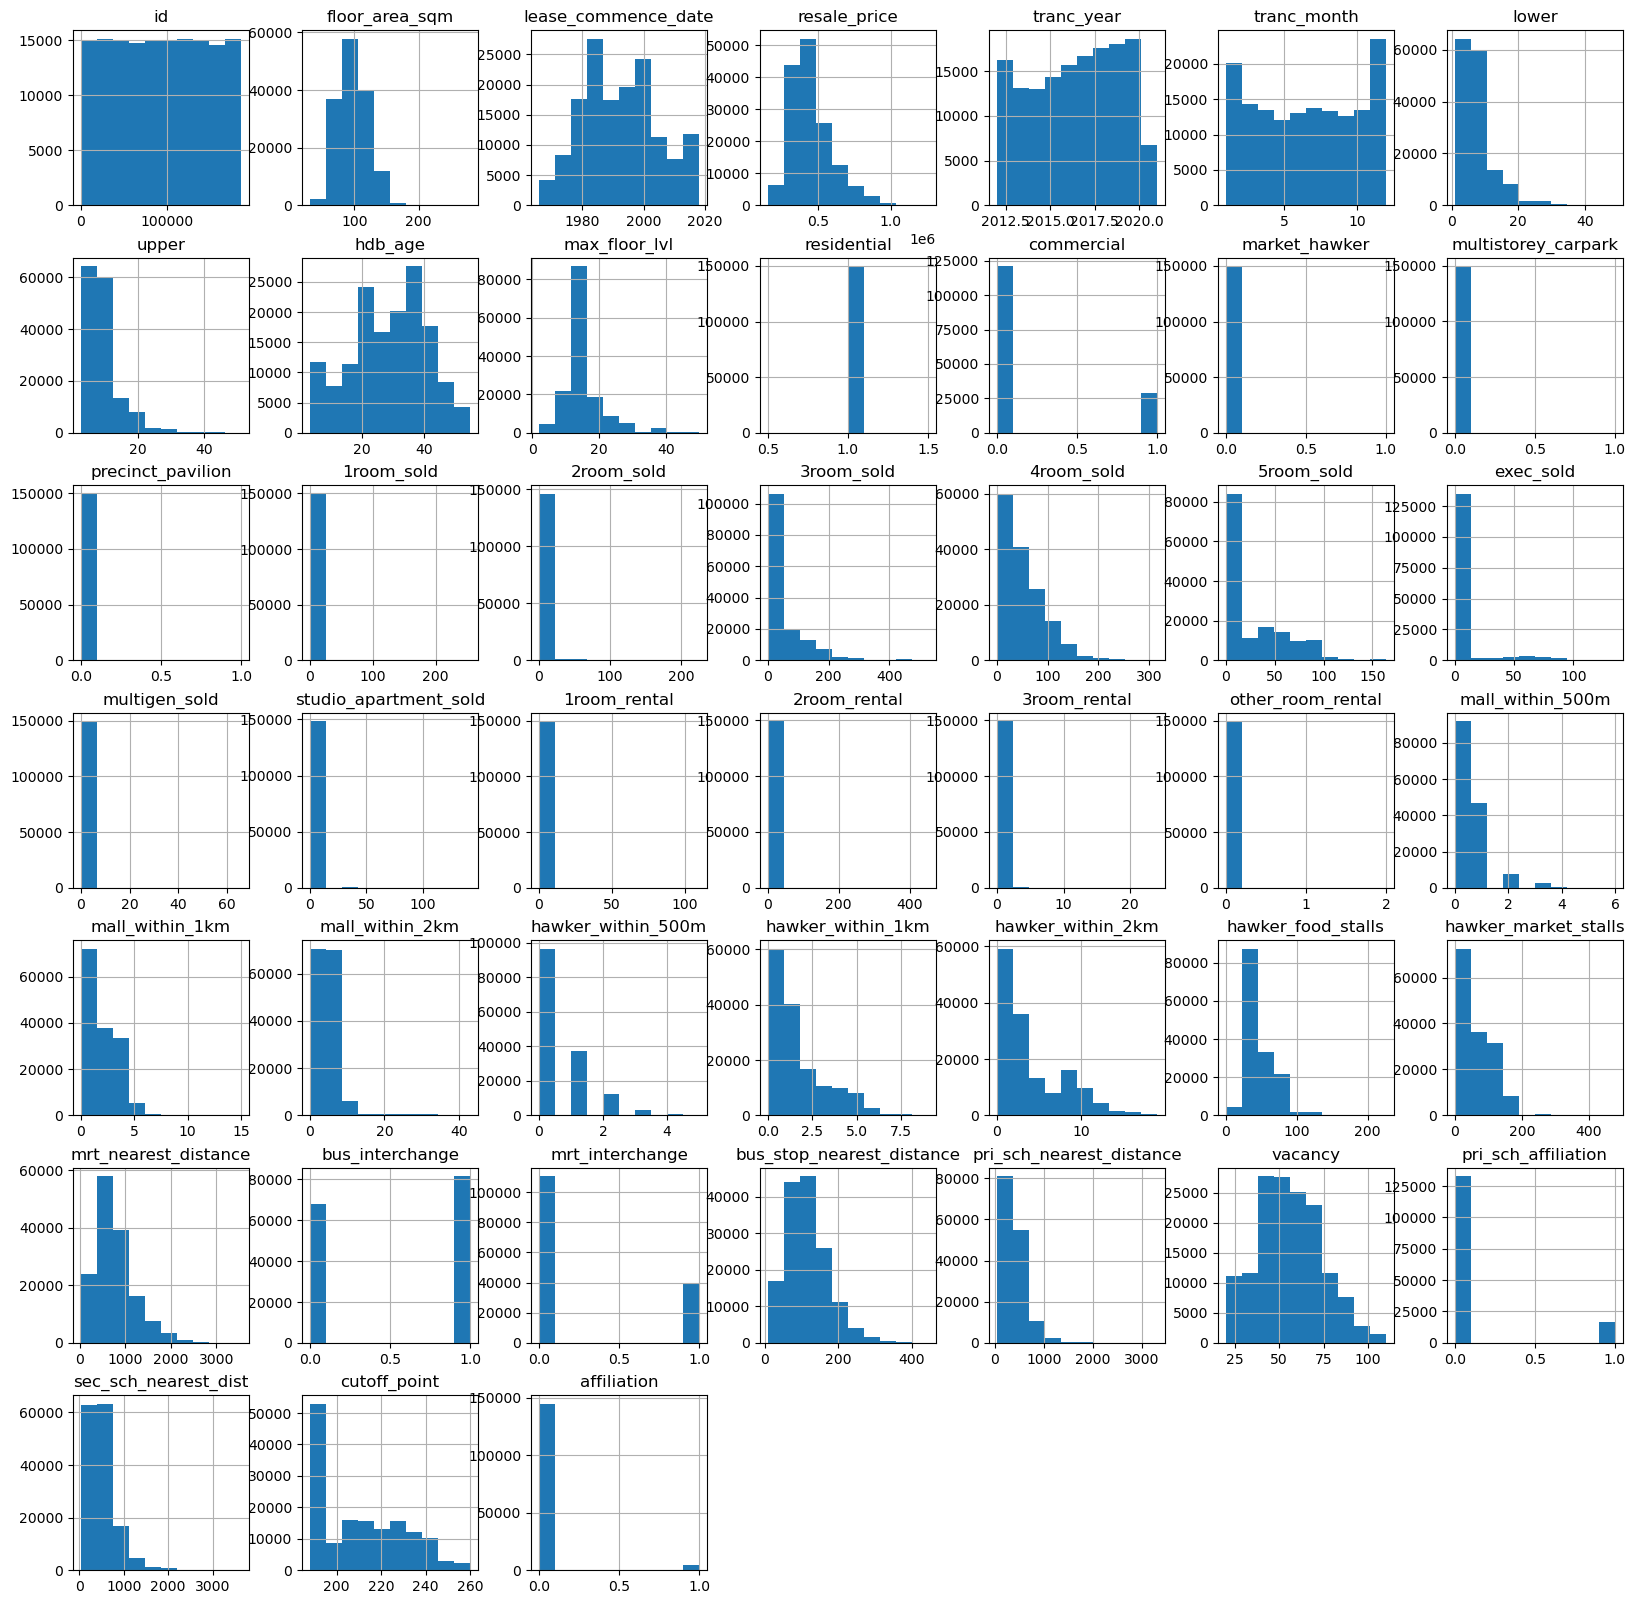

In [24]:
train.hist(figsize=(20, 20));

We can see that multiple columns, namely the boolean ones, do not have many True values.

Other columns such as resale price, floor area, mrt and bust stop nearest distance, etc. roughly follow a normal distribution. 

### Correlation Chart

Let's take a closer look at the correlation chart of the features in relation to the resale price, to see the relationship between the features.

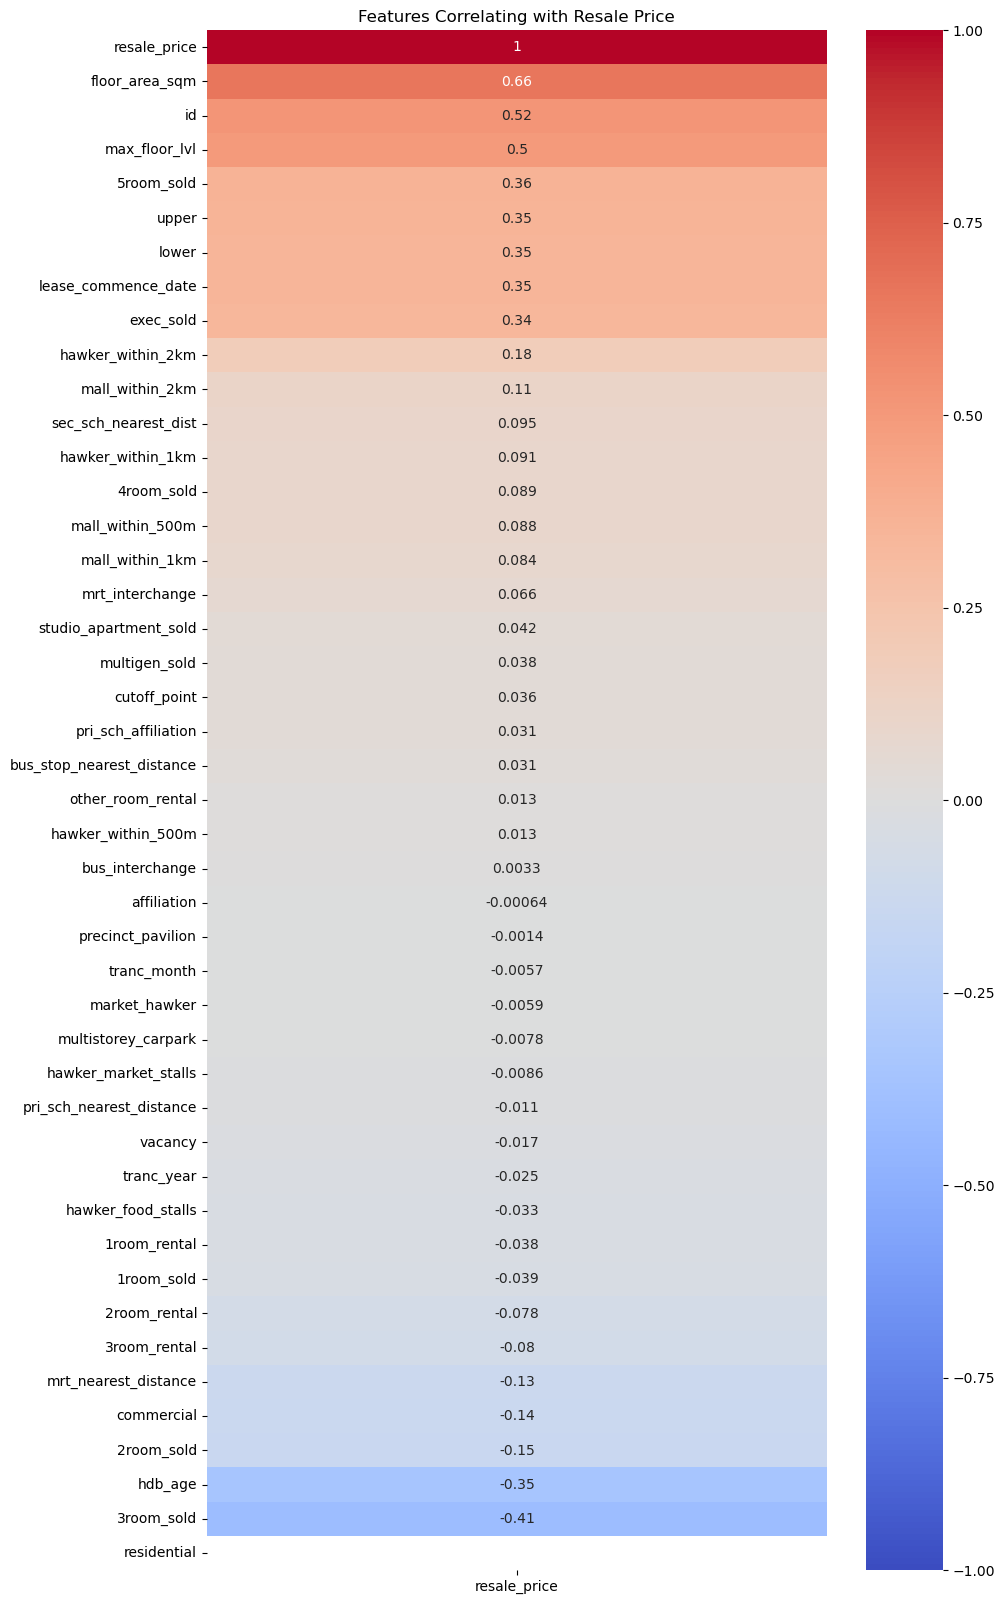

In [25]:
plt.figure(figsize=(10, 20))

heatmap = sns.heatmap(train.corr(numeric_only = True)[['resale_price']].sort_values(by='resale_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm');
heatmap.set_title('Features Correlating with Resale Price');


First thoughts on the correlation heatmap is that the area contributes the most to the determination of resale price.

Trying to be strict with the number of columns, as there are too many, and we should try and narrow down columns which are more crutial.

Will drop the following columns as well due to them being boolean values, with a large majority being the same value, hence it may not be very useful in the further analysis

> 13  residential                
> 14  commercial                 
> 15  market_hawker             
> 16  multistorey_carpark        
> 17  precinct_pavilion          

In [26]:
drop_3 = ['residential', 'commercial', 'market_hawker', 
          'multistorey_carpark', 'precinct_pavilion']
train.drop(columns = drop_3, inplace = True)
train.head()

id  flat_type  floor_area_sqm  flat_model  lease_commence_date  \
0   88471     4 Room            90.0     Model A                 2006   
1  122598     5 Room           130.0    Improved                 1987   
2  170897  Executive           144.0   Apartment                 1997   
3   86070     4 Room           103.0     Model A                 1992   
4  153632     4 Room            83.0  Simplified                 1987   

   resale_price  tranc_year  tranc_month  lower  upper  hdb_age  \
0      680000.0        2016            5     10     12       15   
1      665000.0        2012            7      7      9       34   
2      838000.0        2013            7     13     15       24   
3      550000.0        2012            4      1      5       29   
4      298000.0        2017           12      1      3       34   

   max_floor_lvl  1room_sold  2room_sold  3room_sold  4room_sold  5room_sold  \
0             25           0           0           0          96          46   
1              9           0           0           0          56          56   
2             16           0           0           0           0          30   
3             11           0           0           0          68           7   
4              4           0           0           0          30          18   

   exec_sold  multigen_sold  studio_apartment_sold  1room_rental  \
0          0              0                      0             0   
1          0              0                      0             0   
2         60              0                      0             0   
3          0              0                      0             0   
4          0              0                      0             0   

   2room_rental  3room_rental  other_room_rental planning_area  \
0             0             0                  0       Kallang   
1             0             0                  0        Bishan   
2             0             0                  0   Bukit Batok   
3             0             0                  0        Bishan   
4             0             0                  0        Yishun   

   mall_within_500m  mall_within_1km  mall_within_2km  hawker_within_500m  \
0                 0                0                7                   1   
1                 0                1                3                   0   
2                 0                0                4                   0   
3                 0                1                4                   0   
4                 0                1                2                   0   

   hawker_within_1km  hawker_within_2km  hawker_food_stalls  \
0                  3                 13                  84   
1                  1                  7                  80   
2                  0                  1                  84   
3                  1                  9                  32   
4                  0                  1                  45   

   hawker_market_stalls  mrt_nearest_distance     mrt_name  bus_interchange  \
0                    60            330.083069      Kallang                0   
1                    77            903.659703       Bishan                1   
2                    95           1334.251197  Bukit Batok                1   
3                    86            907.453484       Bishan                1   
4                     0            412.343032       Khatib                0   

   mrt_interchange  bus_stop_nearest_distance  pri_sch_nearest_distance  \
0                0                  29.427395               1138.633422   
1                1                  58.207761                415.607357   
2                0                 214.747860                498.849039   
3                1                  43.396521                389.515528   
4                0                 129.422752                401.200584   

   vacancy  pri_sch_affiliation  sec_sch_nearest_dist  cutoff_point  \
0       78                    1        

### Scatter Graphs

I would like to take a closer look into how exactly each column affects the resale price. Better seen through some scatter graphs.

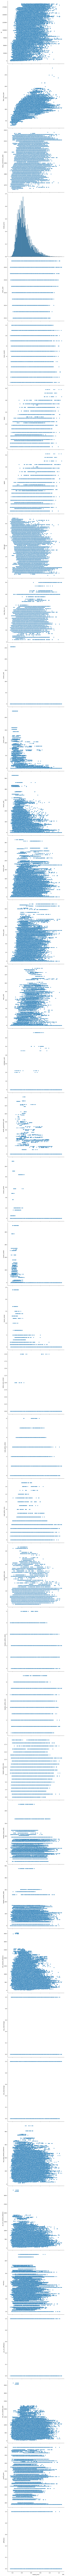

In [27]:
sns.pairplot(train, x_vars=['resale_price'], height= 8);

The scatter graph confirms that 'floor_area_sqm' has a strong correlation to the resale price. Essentially, this means the larger the area, the higher the cost. Logically, this makes sense.

'id' is more of an identifier than an attribute that contributes to the resale price. There is no identifiable trend, and it might not an accurate representation if we leave it in.
* Will **drop 'id'**

In [28]:
train.drop(columns=['id'], inplace= True)

### Outliers

Now let's look at any outliers in our data.


In [29]:
non_object = train.select_dtypes(exclude='object').columns.tolist()

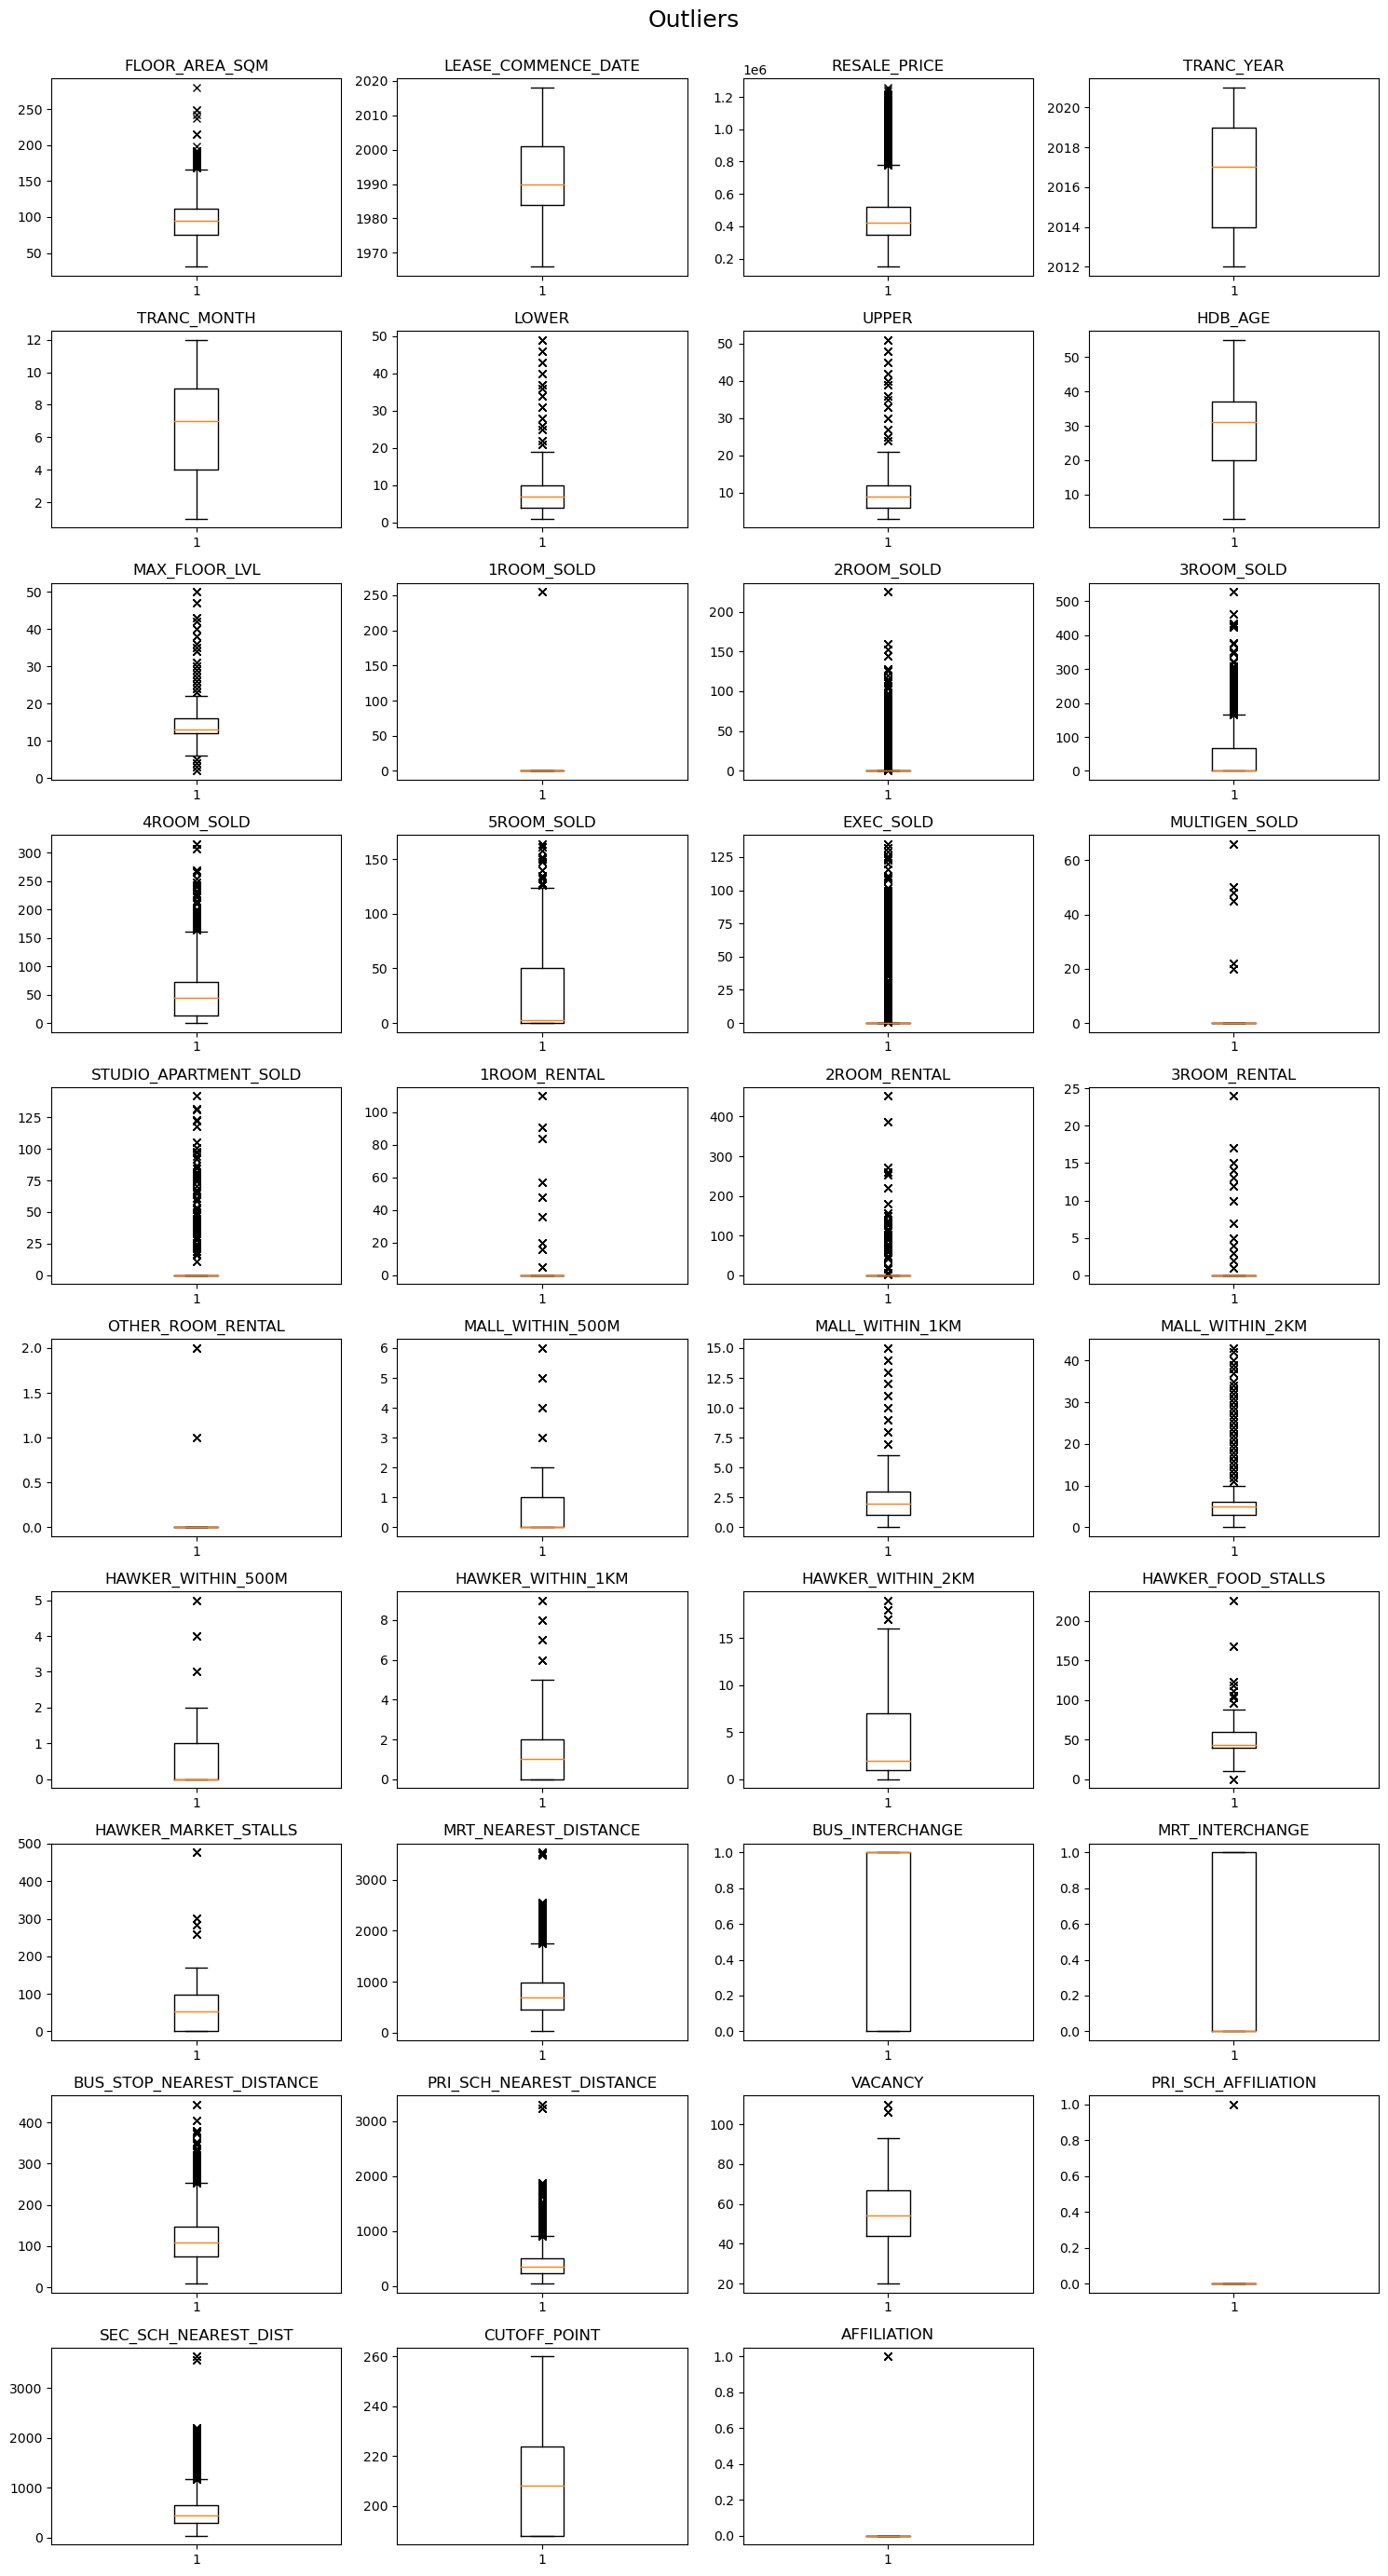

In [30]:
plt.figure(figsize=(15, 30))
plt.subplots_adjust(hspace=0.5)
ttle = plt.suptitle("Outliers", fontsize=18, y=0.95)
ttle.set_position([.5, 0.95])


# loop through the length of tickers and keep track of index
for n, column in enumerate(non_object):
    # add a new subplot iteratively
    ax = plt.subplot(10, 4, n + 1)

    # filter df and plot ticker on the new subplot axis
    # train[column].boxplot(ax=ax)
    ax.boxplot(train[column], sym = 'x', meanline=True)

    # chart formatting
    ax.set_title(column.upper())
    ax.set_xlabel("")

plt.tight_layout(rect=[0, 0.03, 1, 0.95]);
plt.show()

We can definitely see a number of outliers in a few different columns. This is good to note for the future analysis and prediction process. A possible step I could take during the prediction process is to drop more rows with outliers. However, for now, I would like to keep them in as I think it would still contribute greatly to the process, and so as to not lose too much data that could be very valuable.

### Categorical Bar Graphs


#### <u>Flat Type x Resale Price</u>

The above visualisation charts are all in relation to the columns with numerical values. I would like to further investigate how the categories do in terms of correlation to resale price.

In [31]:
def plt_cat_resale(category_column, df, graph_type = 'bar', size_fig=(16, 9)):
    cats = []
    sums = []
    for cat in df[category_column].unique():
        cats.append(cat)
        sum = 0
        num = df[df[category_column] == cat].shape[0]
        for ind in df[df[category_column] == cat].index:
            sum += df.loc[ind, 'resale_price']
        sums.append(sum/num)

    temp = pd.DataFrame({category_column: cats, 'resale_price': sums})
    temp.sort_values("resale_price", ascending=True, inplace = True)
    
    if graph_type == 'bar':
        plt.figure(figsize= size_fig);
        plt.bar(x = temp[category_column], height = temp['resale_price'] );
        plt.title(f'Resale Price In Relation To {category_column.replace("_", " ").title()}');
        plt.xlabel(f'{category_column.replace("_", " ").title()}');
        plt.ylabel('Average Resale Price');
        
    elif graph_type == 'barh':
        plt.figure(figsize= size_fig);
        plt.barh(y = temp[category_column], width = temp['resale_price']);
        plt.title(f'Resale Price In Relation To {category_column.replace("_", " ").title()}');
        plt.ylabel(f'{category_column.replace("_", " ").title()}');
        plt.xlabel('Average Resale Price');

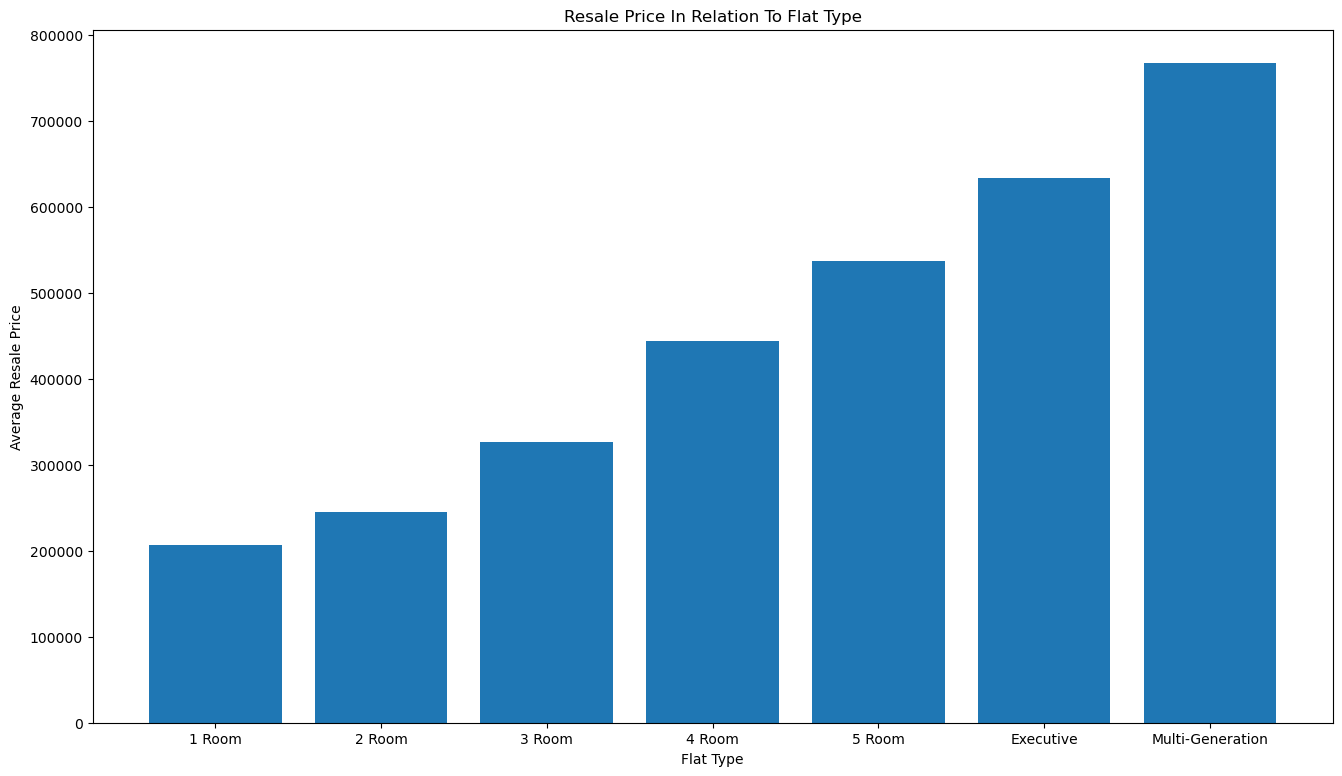

In [32]:
plt_cat_resale('flat_type', train);

Average resale price increases upon housings with more rooms. This would relate directly with the area square meter of the properties, as more rooms means more floor area , which means it’s more expensive. Again, very logical.

#### <u>Flat Model x Resale Price</u>

Now let's break it down in terms of flat models.

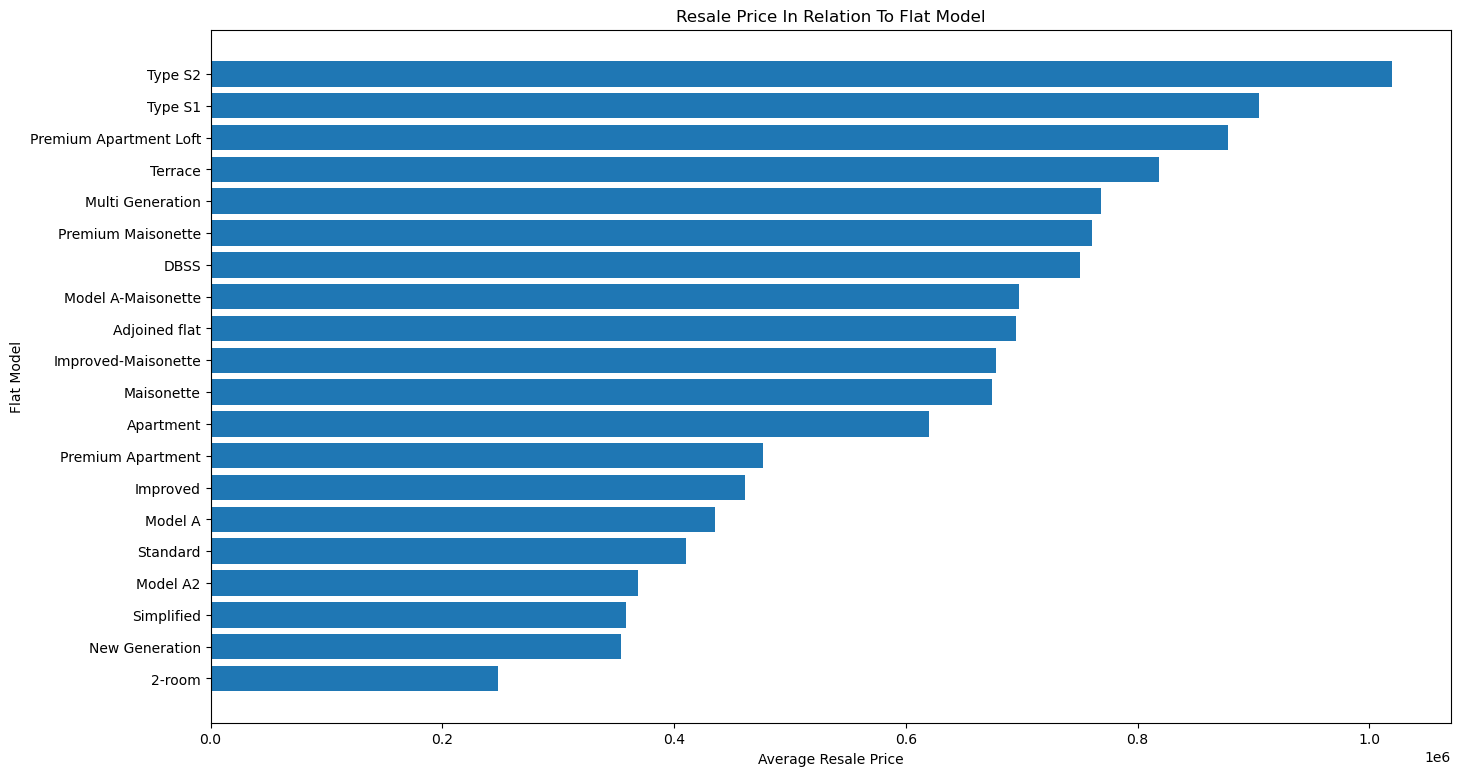

In [33]:
plt_cat_resale('flat_model', train, 'barh')

This would give us a good gauge of which flat models tend to be more expensive, and which are less so.

#### <u>Planning Area x Resale Price</u>

Last two columns I'd like to analyse for the categories, is the Planning Area and the MRT Names.

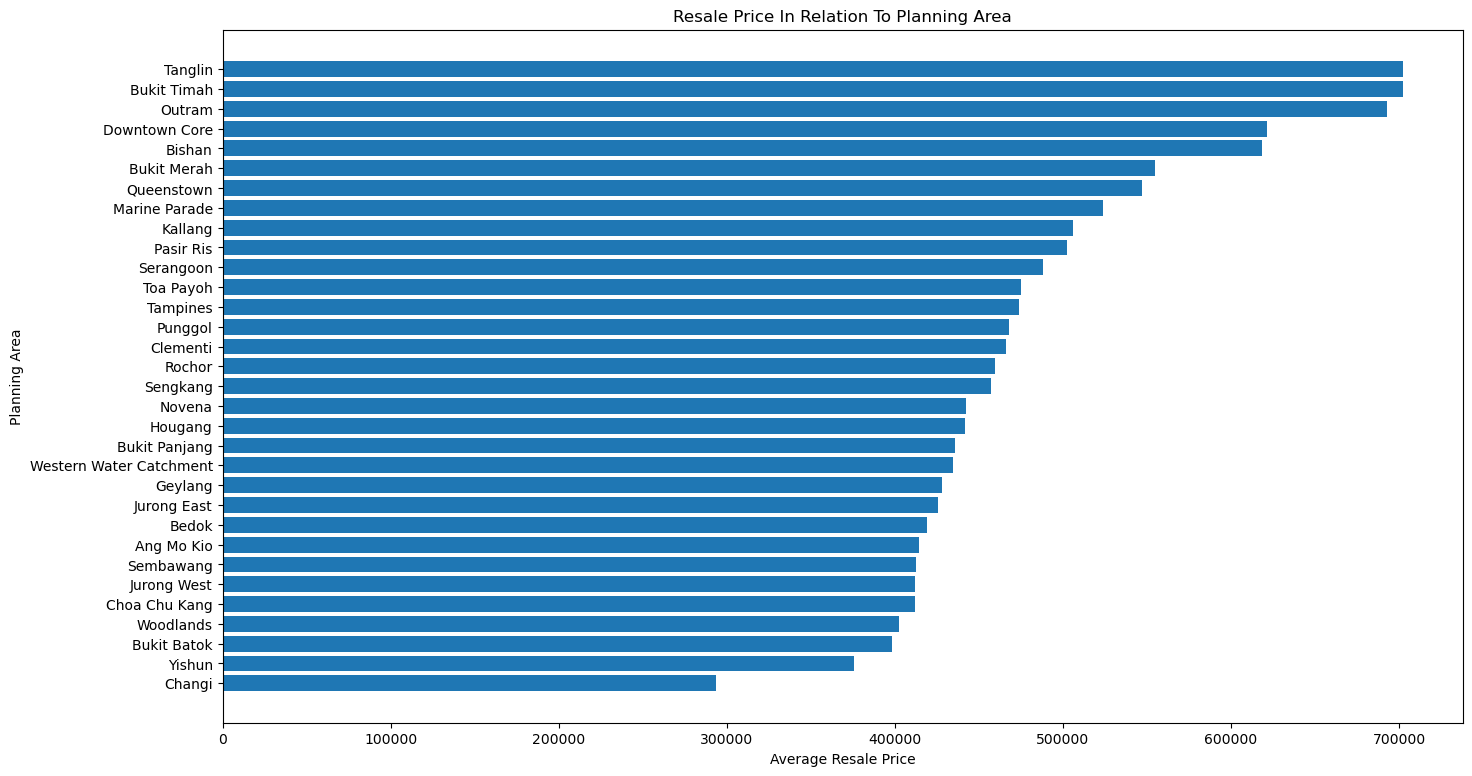

In [34]:
plt_cat_resale('planning_area', train, 'barh')

As like before, the graph gives a good idea of which planning areas are considered more expensive, and less so.

It makes sense for Tanglin to be more expensive as the planning area is more in town. Similarly, Changi would be least expensive likely due to it being so close to the airport, and much further away from town.

#### <u>MRT Names x Resale Price</u>

Let's see if MRT names has a more detailed breakdown than the planning area.

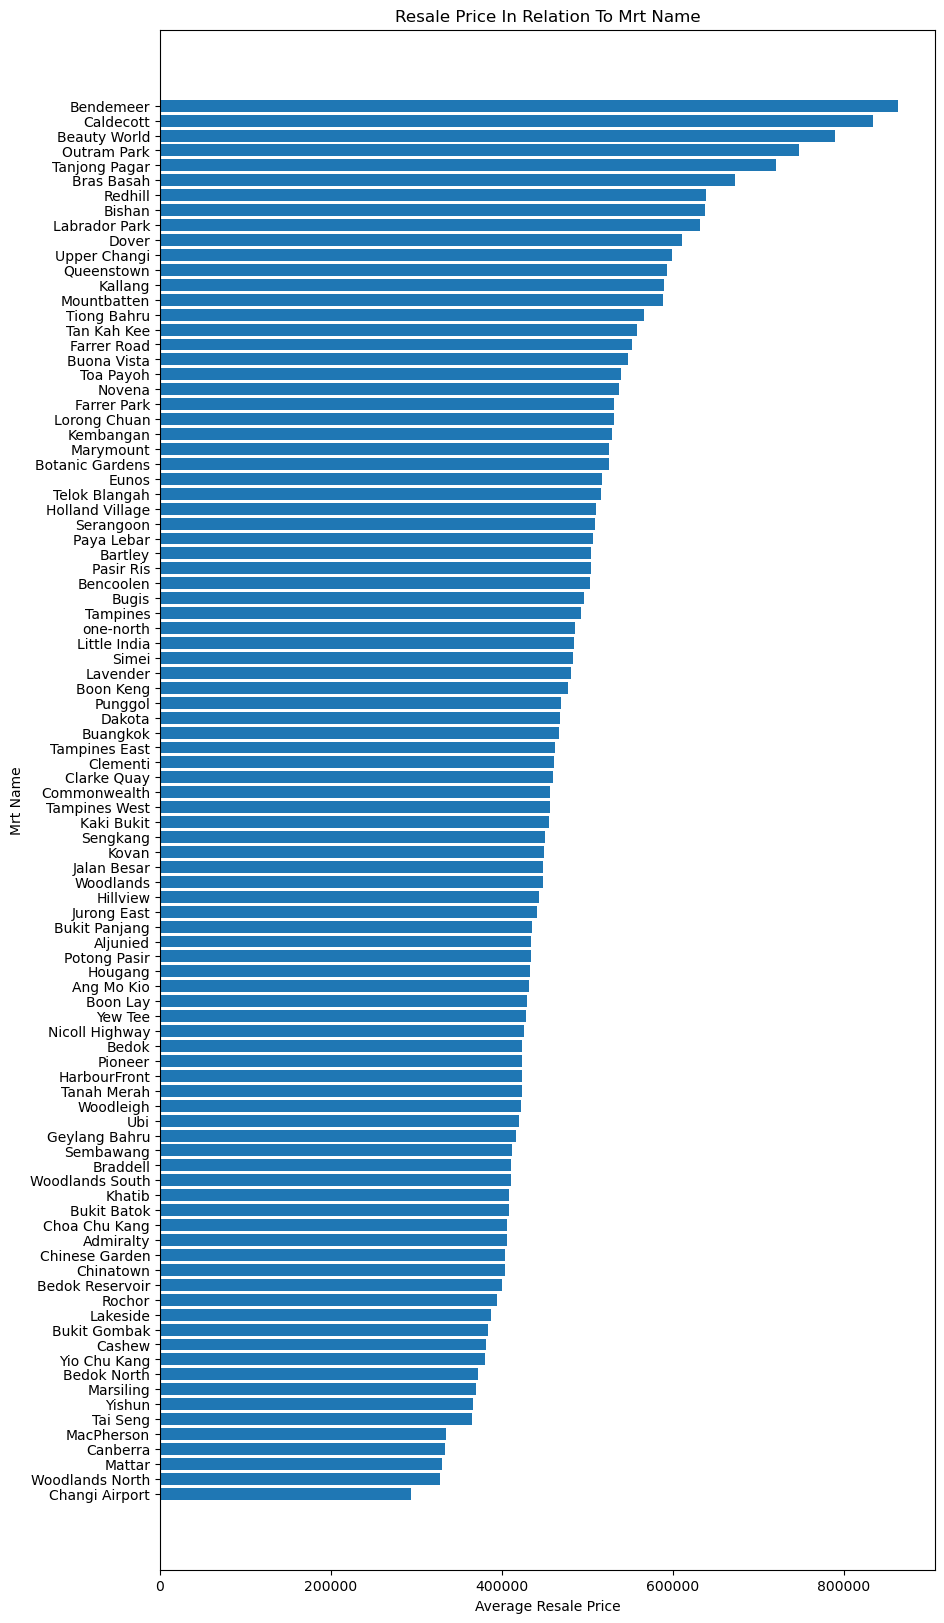

In [35]:
plt_cat_resale('mrt_name', train, 'barh', size_fig = (10, 20))

Looking through all the graphs, we can see the MRT Names give a lot more precise numbers compared to the Planning Area, which contains the overall area where diffferent MRTs could be grouped together. Hence, we should use this column for our future predictions.

The Planning Area graphs would be appropriate to present to an audience as it is not too overwhelming. However, for the purpose of further analysis and predictions, I would like to use the more detailed MRT Names columns, and drop the planning area.

In [36]:
train.drop(columns = 'planning_area', inplace = True)
train.head()

flat_type  floor_area_sqm  flat_model  lease_commence_date  resale_price  \
0     4 Room            90.0     Model A                 2006      680000.0   
1     5 Room           130.0    Improved                 1987      665000.0   
2  Executive           144.0   Apartment                 1997      838000.0   
3     4 Room           103.0     Model A                 1992      550000.0   
4     4 Room            83.0  Simplified                 1987      298000.0   

   tranc_year  tranc_month  lower  upper  hdb_age  max_floor_lvl  1room_sold  \
0        2016            5     10     12       15             25           0   
1        2012            7      7      9       34              9           0   
2        2013            7     13     15       24             16           0   
3        2012            4      1      5       29             11           0   
4        2017           12      1      3       34              4           0   

   2room_sold  3room_sold  4room_sold  5room_sold  exec_sold  multigen_sold  \
0           0           0          96          46          0              0   
1           0           0          56          56          0              0   
2           0           0           0          30         60              0   
3           0           0          68           7          0              0   
4           0           0          30          18          0              0   

   studio_apartment_sold  1room_rental  2room_rental  3room_rental  \
0                      0             0             0             0   
1                      0             0             0             0   
2                      0             0             0             0   
3                      0             0             0             0   
4                      0             0             0             0   

   other_room_rental  mall_within_500m  mall_within_1km  mall_within_2km  \
0                  0                 0                0                7   
1                  0                 0                1                3   
2                  0                 0                0                4   
3                  0                 0                1                4   
4                  0                 0                1                2   

   hawker_within_500m  hawker_within_1km  hawker_within_2km  \
0                   1                  3                 13   
1                   0                  1                  7   
2                   0                  0                  1   
3                   0                  1                  9   
4                   0                  0                  1   

   hawker_food_stalls  hawker_market_stalls  mrt_nearest_distance  \
0                  84                    60            330.083069   
1                  80                    77            903.659703   
2                  84                    95           1334.251197   
3                  32                    86            907.453484   
4                  45                     0            412.343032   

      mrt_name  bus_interchange  mrt_interchange  bus_stop_nearest_distance  \
0      Kallang                0                0                  29.427395   
1       Bishan                1                1                  58.207761   
2  Bukit Batok                1                0                 214.747860   
3       Bishan                1                1                  43.396521   
4       Khatib                0                0                 129.422752   

   pri_sch_nearest_distance  vacancy  pri_sch_affiliation  \
0               1138.633422       78                    1   
1                415.607357       45                    1   
2                498.849039       39                    0   
3                389.515528       20                    1   
4                401.200584       74                    0   

   sec_sch_nearest_dist  cutoff_point  affiliation  
0    

### Resale Price Against Time

Lastly, I would like to analyse how the prices change as the years go by.

In [37]:
time_train = train.sort_values(['tranc_year', 'tranc_month'], ascending = [True, True])
time_train['tranc_date'] = pd.to_datetime((time_train['tranc_year'].astype(str) + "/" + time_train['tranc_month'].astype(str) + "/" + "01"), format = "%Y/%m/%d")
time_train.head()

flat_type  floor_area_sqm         flat_model  lease_commence_date  \
7       3 Room            68.0     New Generation                 1980   
23   Executive           148.0         Maisonette                 1992   
51      4 Room            91.0     New Generation                 1978   
130     4 Room            92.0  Premium Apartment                 2007   
170     5 Room           126.0           Improved                 1996   

     resale_price  tranc_year  tranc_month  lower  upper  hdb_age  \
7        340000.0        2012            3      6     10       41   
23       605000.0        2012            3      1      5       29   
51       495000.0        2012            3      1      5       43   
130      510000.0        2012            3      6     10       14   
170      759000.0        2012            3      6     10       25   

     max_floor_lvl  1room_sold  2room_sold  3room_sold  4room_sold  \
7               12           0           0         110          22   
23              11           0           0           0           0   
51              16           0           0           0         180   
130             17           0           0           0          63   
170             21           0           0           0          20   

     5room_sold  exec_sold  multigen_sold  studio_apartment_sold  \
7             0          0              0                      0   
23            0         50              0                      0   
51            0          0              0                      0   
130           0          0              0                      0   
170          82          0              0                      0   

     1room_rental  2room_rental  3room_rental  other_room_rental  \
7               0             0             0                  0   
23              0             0             0                  0   
51              0             0             0                  0   
130             0             0             0                  0   
170             0             0             0                  0   

     mall_within_500m  mall_within_1km  mall_within_2km  hawker_within_500m  \
7                   0                0                3                   0   
23                  1                2                8                   0   
51                  0                1                9                   1   
130                 1                2                4                   0   
170                 0                1                5                   4   

     hawker_within_1km  hawker_within_2km  hawker_food_stalls  \
7                    2                  5                  36   
23                   1                  1                  40   
51                   2                  8                  42   
130                  0                  0                  40   
170                  5                 16                  96   

     hawker_market_stalls  mrt_nearest_distance     mrt_name  bus_interchange  \
7                      75            291.626388  Bedok North                0   
23                      0            476.267856     Buangkok                1   
51                     71            308.534461        Eunos                1   
130                     0           1371.092378      Punggol                1   
170                     0            379.149214      Redhill                0   

     mrt_interchange  bus_stop_nearest_distance  pri_sch_nearest_distance  \
7                  0                  71.972918                365.790881   
23                 0                  75.032491                405.670701   
51                 0                 301.731060                297.387872   
130                1                  88.079919                101.803112   
170                0                 195.455843                478.660876   

     vacancy  pri_sch_affiliation  sec_sch_nearest_dist  cutoff_point  \
7         56     

Ways to visualise resale price against time:
* Average resale price per MRT name
* Average resale price per flat type
* Average resale price per month per year

In [38]:
len(list(time_train['mrt_name'].unique()))

94

Considering the number of unique MRT names, plotting graphs on this would not be the most efficient, and it might not have enough of each category for us to infer any information from the graphs.

#### <u>Flat Type x Resale Price Against Time</u>

In [39]:
average_resale_flat_type = time_train.groupby(['tranc_year', 'tranc_month', 'flat_type'])['resale_price'].mean().reset_index()
average_resale_flat_type['tranc_date'] = pd.to_datetime((average_resale_flat_type['tranc_year'].astype(str) + "-" + average_resale_flat_type['tranc_month'].astype(str)), format = "%Y-%m")

average_resale_flat_type.head()

tranc_year  tranc_month  flat_type   resale_price tranc_date
0        2012            3     2 Room  266137.523810 2012-03-01
1        2012            3     3 Room  344862.646035 2012-03-01
2        2012            3     4 Room  450721.709816 2012-03-01
3        2012            3     5 Room  536440.843267 2012-03-01
4        2012            3  Executive  621718.684211 2012-03-01

In [40]:
average_resale_flat_type[average_resale_flat_type['flat_type'] == '2 Room'].head()

tranc_year  tranc_month flat_type   resale_price tranc_date
0         2012            3    2 Room  266137.523810 2012-03-01
6         2012            4    2 Room  269970.588235 2012-04-01
12        2012            5    2 Room  267324.000000 2012-05-01
18        2012            6    2 Room  259592.857143 2012-06-01
25        2012            7    2 Room  267756.571429 2012-07-01

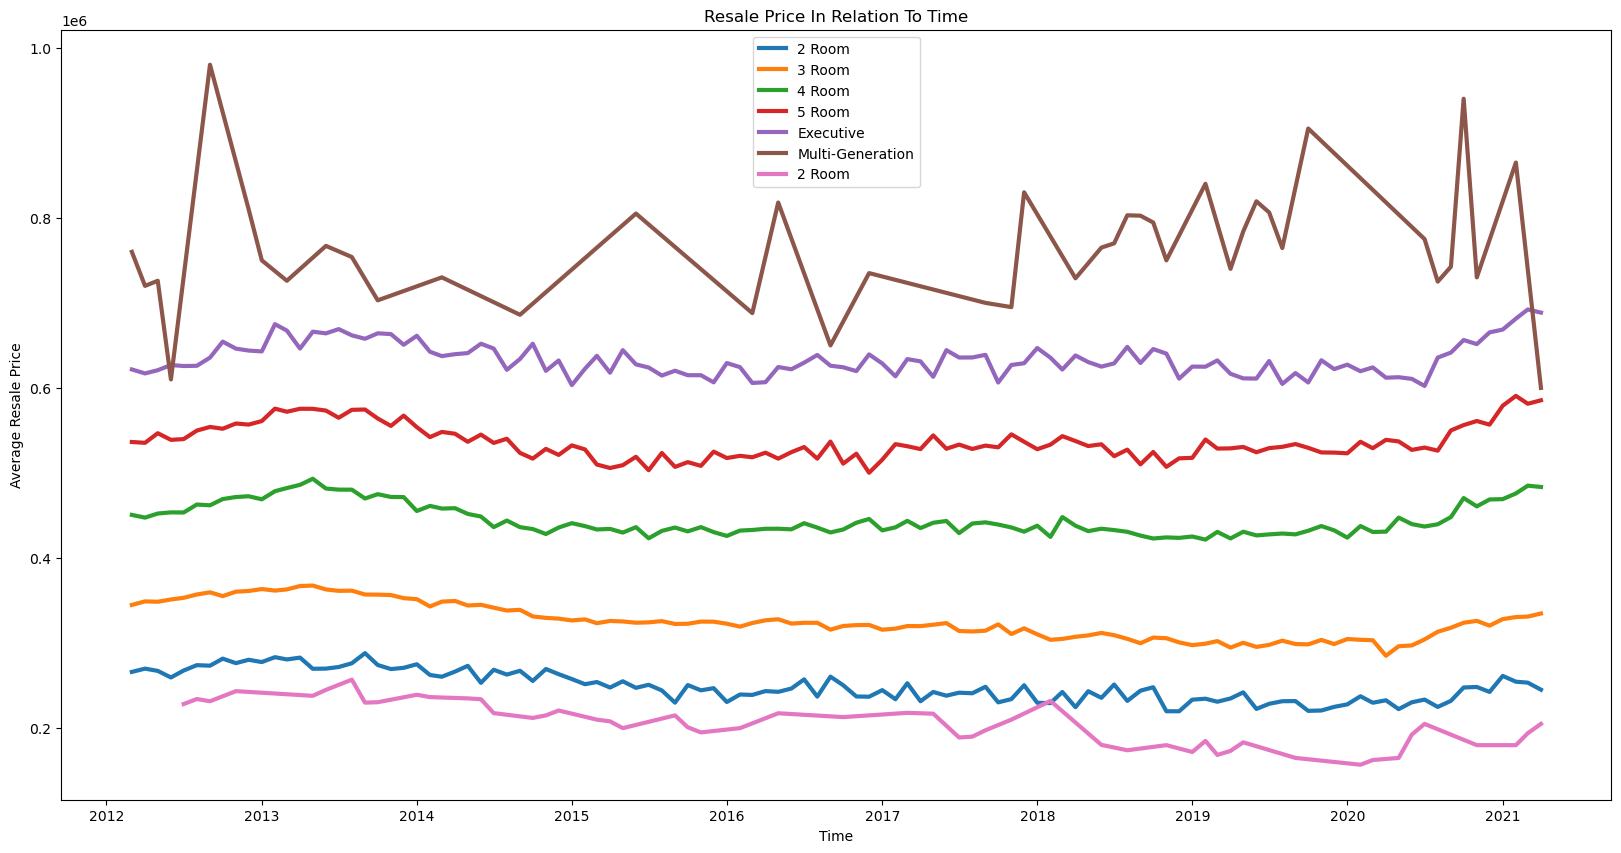

In [47]:
plt.figure(figsize=(20,10));

for type in list(average_resale_flat_type['flat_type'].unique()):

    plt.plot(average_resale_flat_type[average_resale_flat_type['flat_type'] == type]['tranc_date'], average_resale_flat_type[average_resale_flat_type['flat_type'] == type]['resale_price'], linewidth=3);

plt.legend(average_resale_flat_type['flat_type'])
plt.title(f'Resale Price In Relation To Time');
plt.ylabel('Average Resale Price');
plt.xlabel(f'Time');

The graphs definitely follow the categorical bar graphs from above. However, we can also see that the smooth overall trends of all types slowly increase and decrease in the same periods of time.

#### <u>Average Resale Price Per Month Against Time</u>

Lastly, let's see how the average resale price fairs per month.


In [42]:
average_resale_month_year = time_train.groupby(['tranc_year', 'tranc_month'])['resale_price'].mean().reset_index()
average_resale_month_year['tranc_date'] = pd.to_datetime((average_resale_month_year['tranc_year'].astype(str) + "-" + average_resale_month_year['tranc_month'].astype(str)), format = "%Y-%m")

average_resale_month_year.head()

tranc_year  tranc_month   resale_price tranc_date
0        2012            3  454145.729738 2012-03-01
1        2012            4  453807.551402 2012-04-01
2        2012            5  458472.759210 2012-05-01
3        2012            6  462182.895052 2012-06-01
4        2012            7  461550.138941 2012-07-01

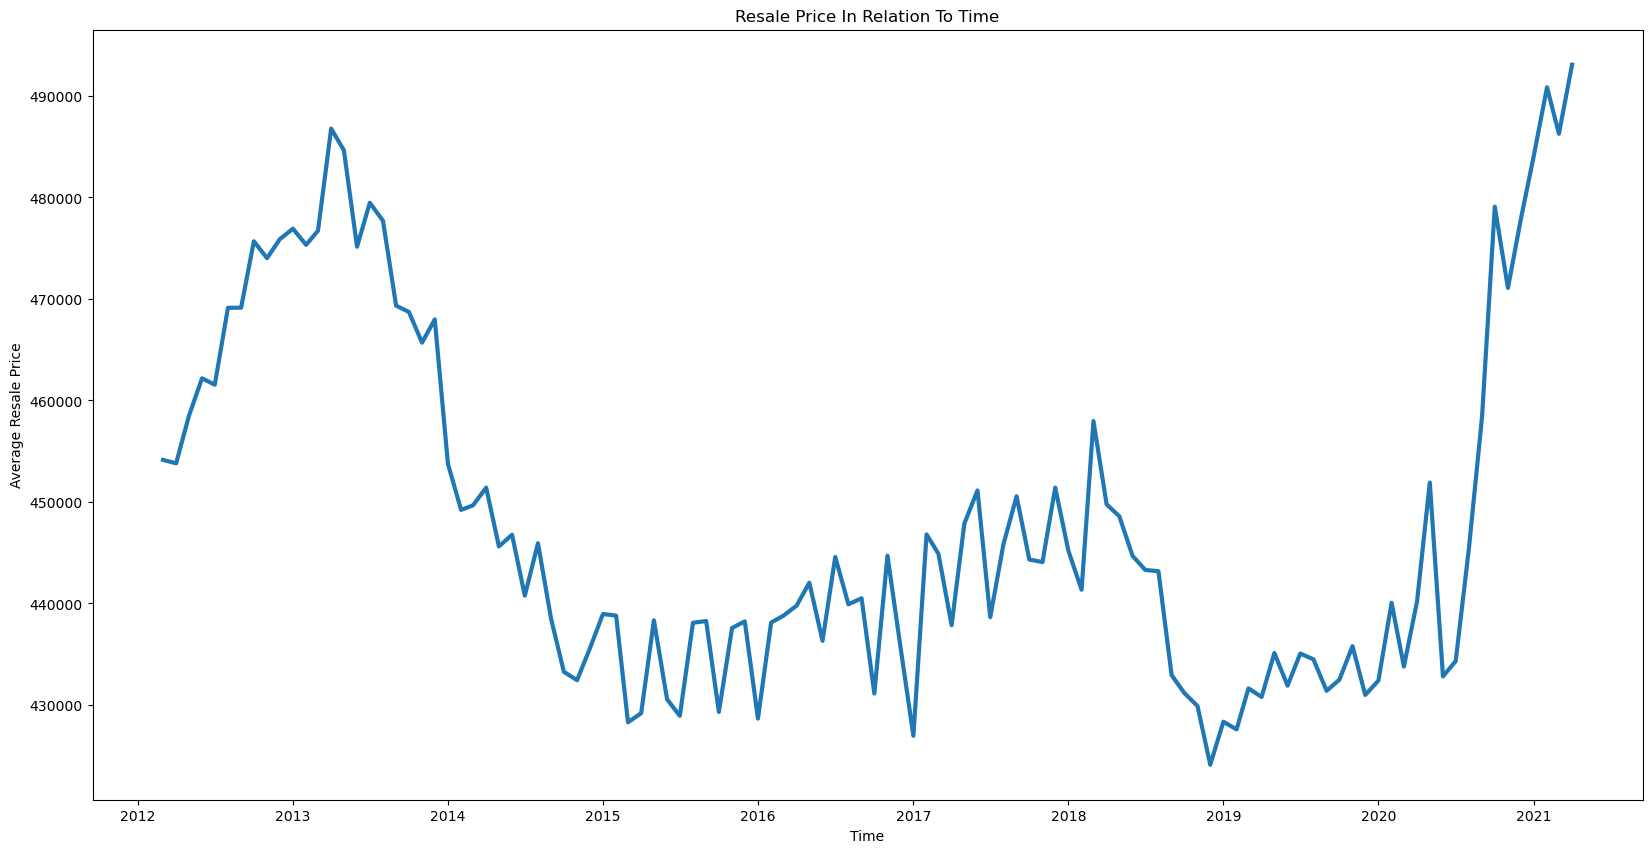

In [46]:
plt.figure(figsize=(20,10));
plt.plot(average_resale_month_year['tranc_date'], average_resale_month_year['resale_price'], linewidth=3);

plt.title(f'Resale Price In Relation To Time');
plt.ylabel('Average Resale Price');
plt.xlabel(f'Time');

We can see that this shows a more exaggerated increase and decrease in resale price as per what we saw in the previous graph with the flat types breakdown. Therefore, we know approximately how the market faired around each period of time. 

Let's move on to the next notebook where we will use all this information to predict resale prices.

In [44]:
if not os.path.exists('output'):
    os.makedirs('output') 
train.to_csv('output/train.csv', index= False)